# Experiment Notebook Code

Get the data

In [1]:
import csv
import os
from telnetlib import OUTMRK
from tkinter import END
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getData(folder_path):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Loop through the CSV files
    
    outputData = {}
    rssiVals = {}
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        with open(file_path, newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader, None)
            
            for row in reader:
                if len(row) == 9:
                    node_id, packet_no, iteration, rssi, absTime, recordedTime, x_dist, y_distRx, y_distTx = map(float, row)
                elif len(row)==8:
                    packet_no, iteration, rssi, absTime, recordedTime, x_dist, y_distRx, y_distTx = map(float, row)
                elif len(row)==13:
                    row = row[:-1]
                    node_id, packet_no, iteration, rssi, absTime, recordedTime, x_dist, y_distRx, y_distTx, z_dist, angleTx, angleRx = map(float, row)
                    y_distTx+=100

                key = (y_distTx, x_dist)
                if key not in rssiVals:
                    rssiVals[key] = []

                rssiVals[key].append(rssi)
    for key, rssi_values in rssiVals.items():
        avg_rssi = np.array(rssi_values).mean()
        

        if key[0] not in outputData.keys():
            outputData[key[0]] = [[],[]]
        outputData[key[0]][0].append(key[1])
        outputData[key[0]][1].append(avg_rssi)
    return outputData, y_distRx

folder_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData3and4";

data, y_distRx = getData(folder_path);



Display the Data

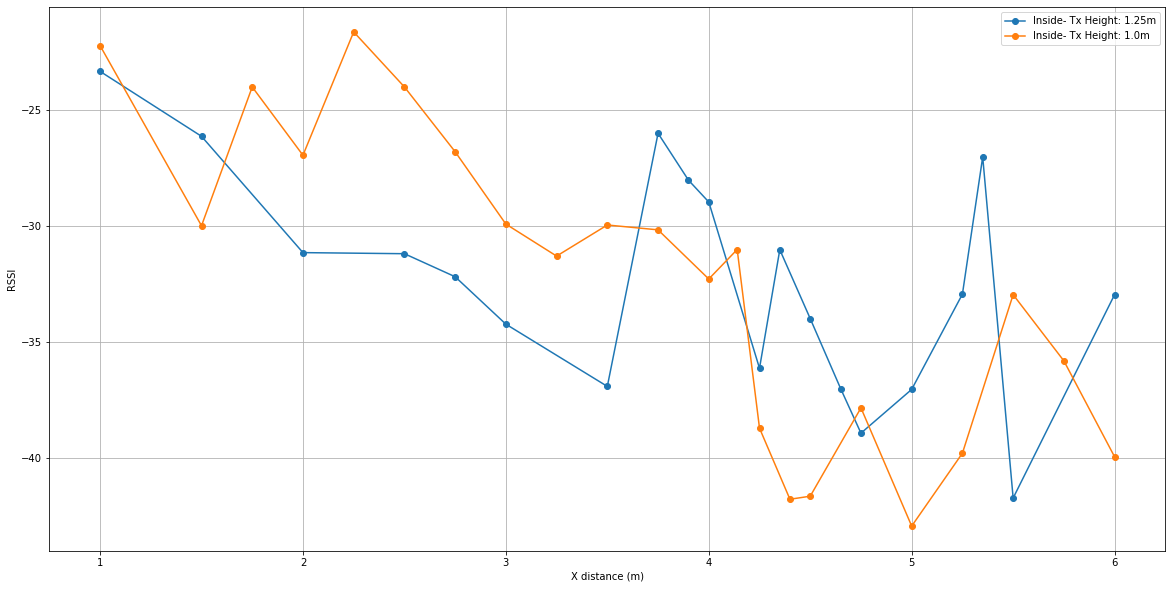

In [3]:
def plotData(x, y, style = '-o', figure = None, xAxis = "X distance (m)", yAxis = "RSSI", labelName = None, title  = None):

    x_sorted, y_sorted = zip(*sorted(zip(x, y)))
    plt.figure(figure, figsize=(20,10))
    plt.title(title)
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)
    plt.grid(True)

    plt.plot(x_sorted, y_sorted,style,label = labelName)
    plt.legend()

def displayData(data):
    
    for key in data.keys():
        if key>=100:
            
            plotData(data[key][0],data[key][1], '-o', figure =1, labelName= f"Outside- Tx Height: {key-100}m")
        else:
            plotData(data[key][0],data[key][1], '-o', figure =1, labelName= f"Inside- Tx Height: {key}m")
    plt.show()

displayData(data)


## Calculate LOS distances and display

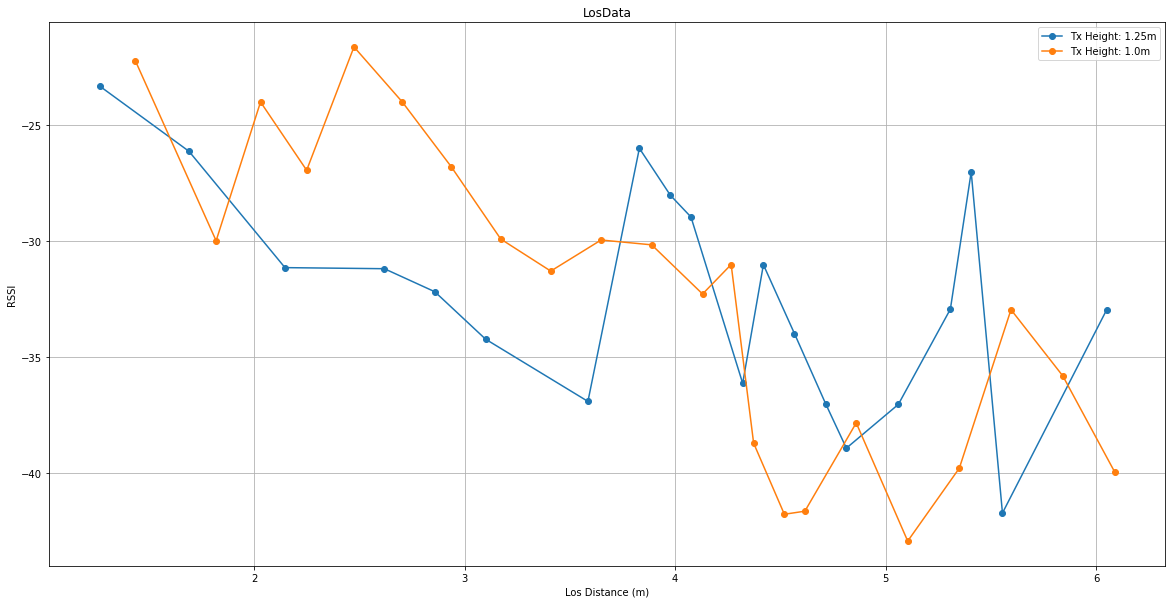

In [4]:
def calculateLOSDistance(x_distance, y_distanceTX, y_distanceRx):

    dist = (x_distance**2+(y_distanceRx-y_distanceTX)**2)**(1/2)
    return dist

def getLOSData(data, y_distRx):
    losData = {}
    for key in data.keys():
        losData[key] = [],[]
        i = 0
        for xval in data[key][0]:
            losData[key][0].append(calculateLOSDistance(xval, float(key), y_distRx))
            losData[key][1].append(data[key][1][i])
            i +=1
    return losData

def displayLOS(data,y_distRx):
    losData = getLOSData(data, y_distRx);
    for key in losData.keys():
        plotData(losData[key][0],losData[key][1], '-o', figure =1, title = "LosData", xAxis= "Los Distance (m)", labelName= f"Tx Height: {key}m")

displayLOS(data, y_distRx)



Calculate Expected Distance using 

$$ distance = 10 ** ((-20 - rssi) / (10 * n)) $$
n = constant, typically between 2 - 4 

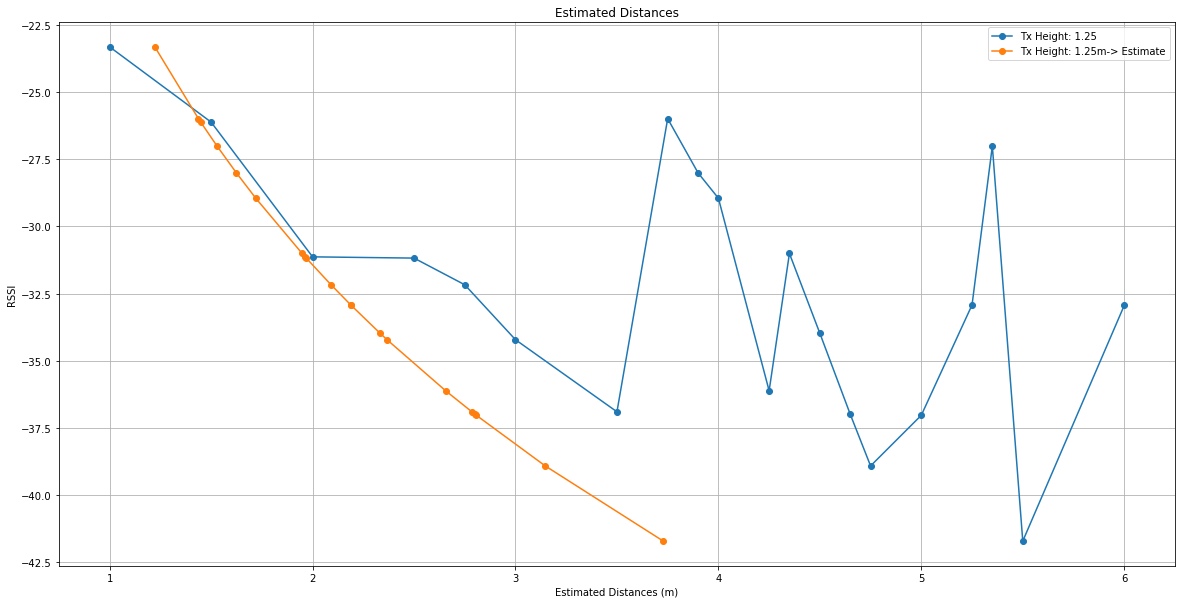

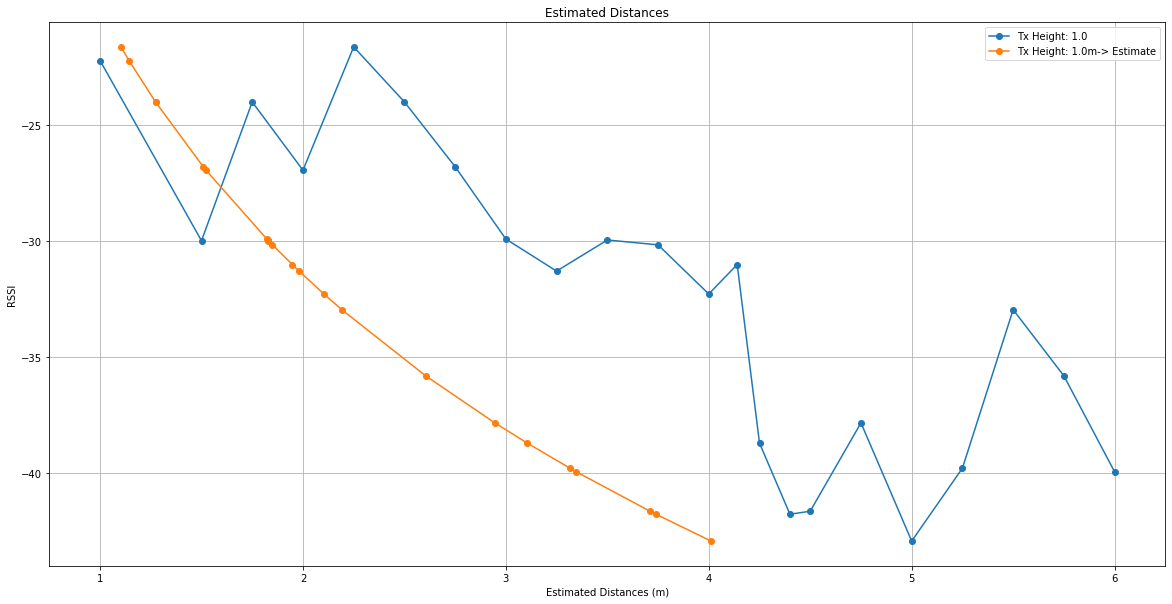

In [5]:
def estimateDistance(rssi, n):
    distance = 10 ** ((-20 - rssi) / (10 * n))
    return distance

def getEstimatedDistance(data, n):
    estimatedDistances = {}
    for key in data.keys():
        estimatedDistances[key] = [],[]
        i = 0
        for xval in data[key][0]:
            estimatedDistances[key][0].append(estimateDistance(data[key][1][i], n))
            estimatedDistances[key][1].append(data[key][1][i])
            i +=1
    return estimatedDistances

def displayEstimatedDistance(data):
    estimatedData = getEstimatedDistance(data, 3.8);
    i = 1
    for key in estimatedData.keys():
        plotData(data[key][0],data[key][1], '-o', figure =i, title = "Estimated Distances", xAxis= "Estimated Distances (m)", labelName= f"Tx Height: {key}")
        plotData(estimatedData[key][0],estimatedData[key][1], '-o', figure =i, title = "Estimated Distances", xAxis= "Estimated Distances (m)", labelName= f"Tx Height: {key}m-> Estimate")
        plt.show()

displayEstimatedDistance(data)


Plotting Estimated Distances With LOS

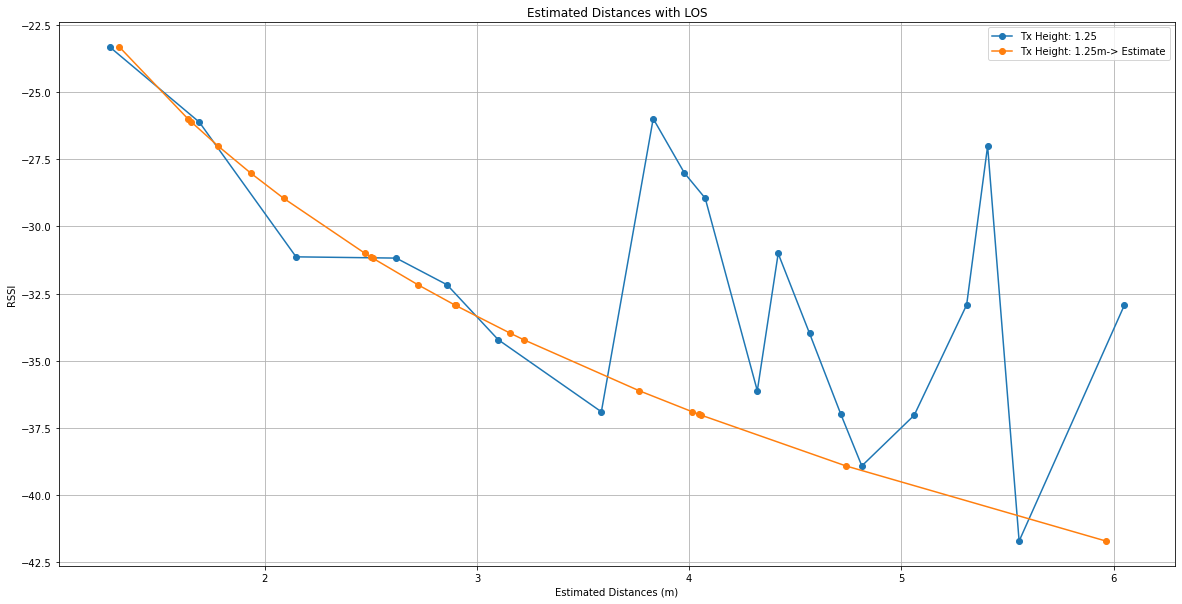

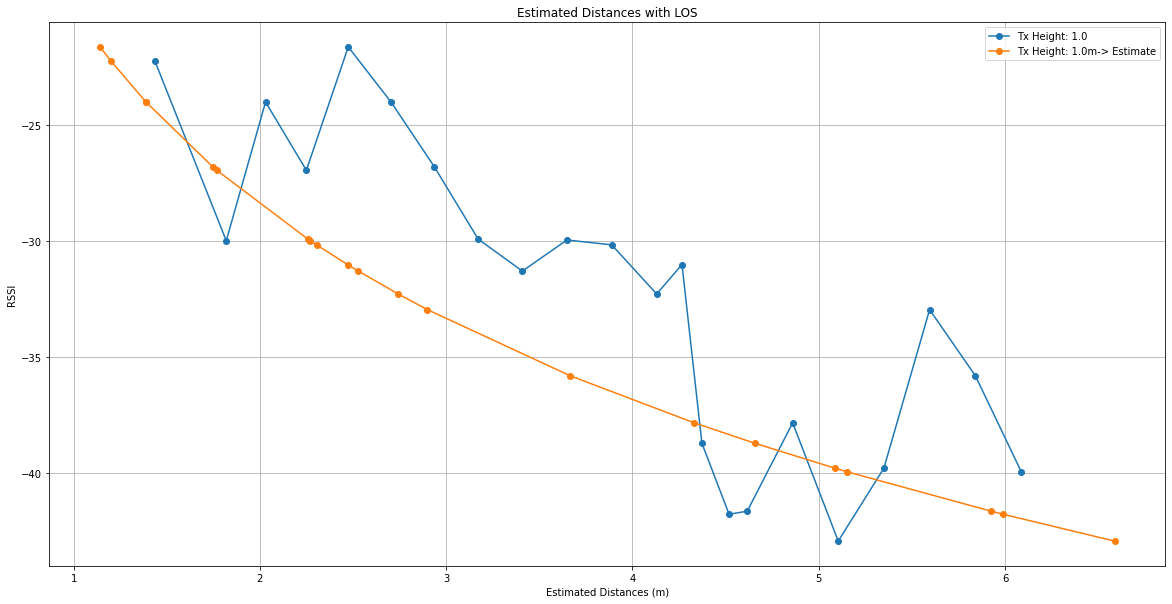

In [6]:
def displayEstimatedDistanceLOS(losData):
    estimatedData = getEstimatedDistance(losData, 2.8);
    i = 1
    for key in estimatedData.keys():
        plotData(losData[key][0],losData[key][1], '-o', figure =i, title = "Estimated Distances with LOS", xAxis= "Estimated Distances (m)", labelName= f"Tx Height: {key}")
        plotData(estimatedData[key][0],estimatedData[key][1], '-o', figure =i, title = "Estimated Distances with LOS", xAxis= "Estimated Distances (m)", labelName= f"Tx Height: {key}m-> Estimate")
        plt.show()

losData = getLOSData(data, y_distRx)
displayEstimatedDistanceLOS(losData)



## Data from Outside

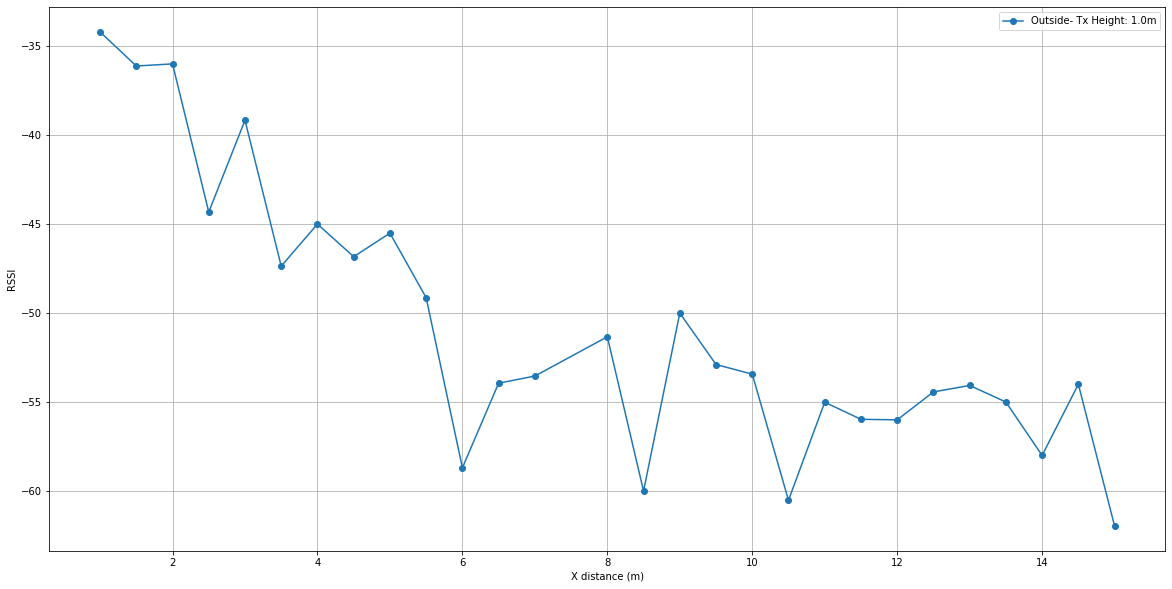

In [7]:
folder_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData7";

data, y_distRx = getData(folder_path);
displayData(data)

Actual Distance

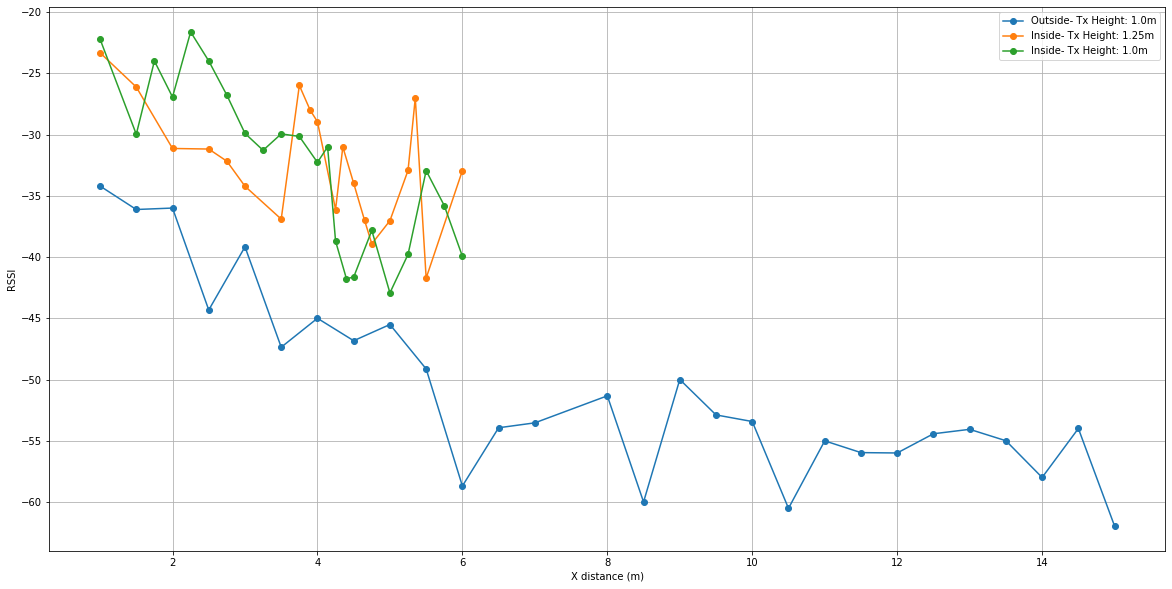

In [8]:
folder_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData3and4and7";

data, y_distRx = getData(folder_path);
displayData(data)

# Angles

In [9]:
def getAngleData(folder_path):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Loop through the CSV files
    
    outputData = {}
    rssiVals = {}
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        with open(file_path, newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader, None)
            
            for row in reader:

                if len(row)==13:
                    orientation = str(row[-1])
                    row = row[:-1]
                    node_id, packet_no, iteration, rssi, absTime, recordedTime, x_dist, y_distRx, y_distTx, z_dist, angleTx, angleRx = map(float, row)

                key = (angleTx, angleRx, orientation)
                if key not in rssiVals:
                    rssiVals[key] = []

                rssiVals[key].append(rssi)
    for key, rssi_values in rssiVals.items():
        avg_rssi = np.array(rssi_values).mean()
        
        if key not in outputData.keys():
            outputData[key] = []
        outputData[key].append(avg_rssi)
    return outputData

folder_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData6";
angleData = getAngleData(folder_path)



## Plot Angle Data in real world scenarios

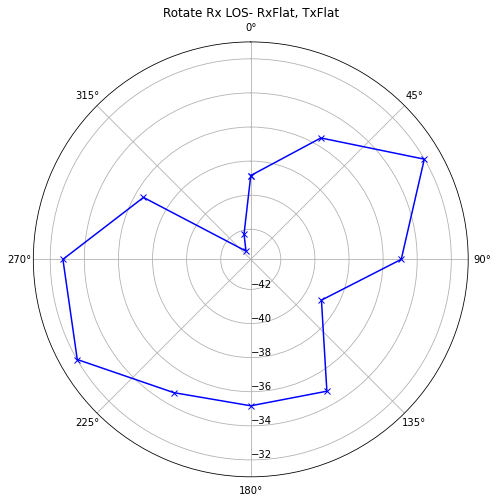

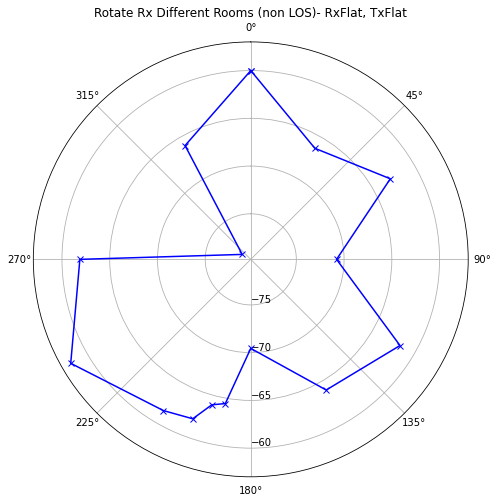

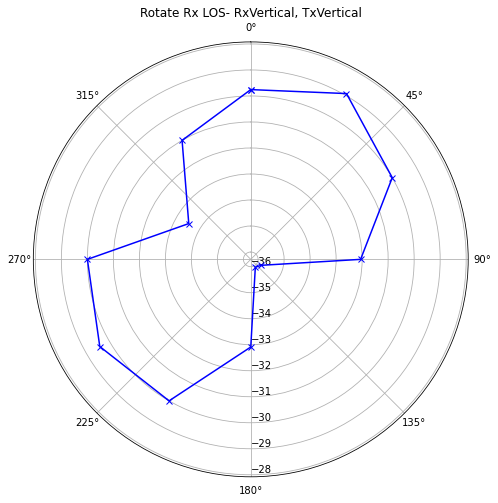

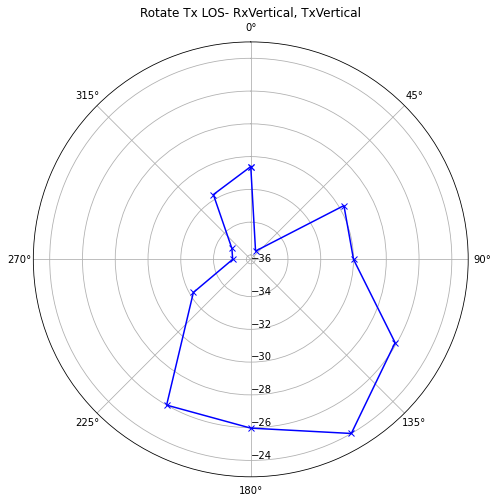

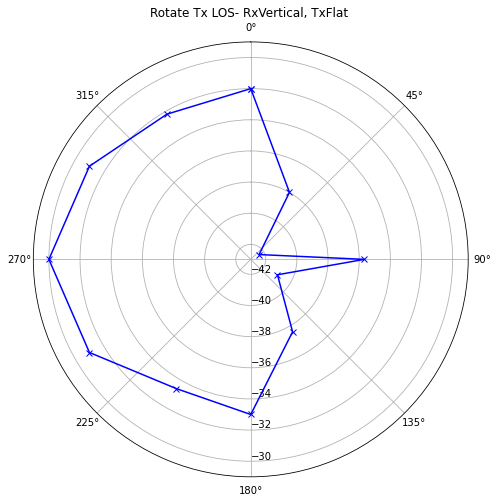

In [10]:
def plotAngleData(angles, rssi_values, style = '-o', figure = None, xAxis = "Angle", yAxis = "RSSI", labelName = None, title  = None):

    # Create a polar plot
    plt.figure(figsize = (8,8))
    ax = plt.subplot(111, projection='polar')
    angles_sorted, rssiVals_sorted = list(zip(*sorted(zip(angles, rssi_values))))


    angles_sorted = np.append(angles_sorted,angles_sorted[0])
    rssiVals_sorted = np.append(rssiVals_sorted,rssiVals_sorted[0])

    # Plot the RSSI values at corresponding angles
    # ax.plot(angles, rssi_values, 'x', color='r')
    ax.plot(np.radians(angles_sorted), rssiVals_sorted, '-x', color='b')

    # ax.fill(angles, rssi_values, color='b', alpha=0.2)

    # Customize the plot
    ax.set_rlabel_position(180)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_rmax(max(rssi_values)+1)  # Set the maximum radius as needed
   
   
    plt.title(title)
    plt.grid(True)

    plt.show()

def displayRxAngleData(angleData, title = "Display Rx Data"):
    angles = []
    rssiVals = []
    for key in angleData.keys():
        angles.append(key[1])
        rssiVals.append(angleData[key][0])
    
    angles_sorted, rssiVals_sorted = zip(*sorted(zip(angles, rssiVals)))

    plotAngleData(angles_sorted, rssiVals_sorted, title = title)
    return angles_sorted, rssiVals_sorted

def displayTxAngleData(angleData, title = "Tx Rotated"):
    angles = []
    rssiVals = []
    for key in angleData.keys():
        angles.append(key[0])
        rssiVals.append(angleData[key][0])
    
    angles_sorted, rssiVals_sorted = zip(*sorted(zip(angles, rssiVals)))
    plotAngleData(angles_sorted, rssiVals_sorted, title = title)


folder_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData5";
angleData = getAngleData(folder_path)
displayRxAngleData(angleData, title = "Rotate Rx LOS- RxFlat, TxFlat")

folder_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData6";
angleData = getAngleData(folder_path)
displayRxAngleData(angleData, title = "Rotate Rx Different Rooms (non LOS)- RxFlat, TxFlat")

folder_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData10";
angleData = getAngleData(folder_path)
displayRxAngleData(angleData, title = "Rotate Rx LOS- RxVertical, TxVertical")


folder_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData11";
angleData = getAngleData(folder_path)
displayTxAngleData(angleData, title = "Rotate Tx LOS- RxVertical, TxVertical")

folder_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData12";
angleData = getAngleData(folder_path)
displayTxAngleData(angleData,title = "Rotate Tx LOS- RxVertical, TxFlat " )



In [11]:
maxRssi = -100

def plotOnOne(ax, angles, rssi_values, label):
        # Create a polar plot
    angles_sorted, rssiVals_sorted = list(zip(*sorted(zip(angles, rssi_values))))
    angles_sorted = np.append(angles_sorted,angles_sorted[0])
    rssiVals_sorted = np.append(rssiVals_sorted,rssiVals_sorted[0])

    # Plot the RSSI values at corresponding angles

    ax.plot(np.radians(angles_sorted), rssiVals_sorted, '-', label = label)

    # ax.fill(angles, rssi_values, color='b', alpha=0.2)

    # Customize the plot
    ax.set_rlabel_position(180)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    # ax.set_rmax(max(rssi_values)+1)  # Set the maximum radius as needed
   

def getAngleDataRotatedRx(angleData):
    angles = []
    rssiVals = []
    for key in angleData.keys():
        angles.append(key[1]+135)

            
        rssiVals.append(angleData[key][0]+24)
    
    angles_sorted, rssiVals_sorted = zip(*sorted(zip(angles, rssiVals)))

    return angles_sorted, rssiVals_sorted

def getAngleDataRotatedTx(angleData):
    angles = []
    rssiVals = []
    for key in angleData.keys():
        angles.append(key[0]+180)
        rssiVals.append(angleData[key][0]+24)
    
    angles_sorted, rssiVals_sorted = zip(*sorted(zip(angles, rssiVals)))

    return angles_sorted, rssiVals_sorted

In [12]:
angleDataList = []
labelList = []
folder_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData11";
angleDataList.append(getAngleDataRotatedTx(getAngleData(folder_path)))
labelList.append("TV-RV")

folder_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData12";
angleDataList.append(getAngleDataRotatedTx(getAngleData(folder_path)))
labelList.append("TV-RF")

folder_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData5";
angleDataList.append(getAngleDataRotatedRx(getAngleData(folder_path)))
labelList.append("TF-RF")

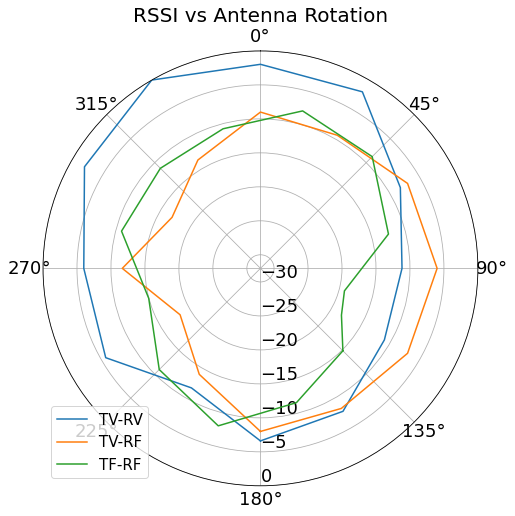

In [13]:
    
plt.figure(figsize = (8,8))
ax = plt.subplot(111, projection='polar')
maxRssi = -100

for i in range(len(angleDataList)):
    plotOnOne(ax, angleDataList[i][0], angleDataList[i][1], labelList[i])

ax.set_rlabel_position(180)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rmax(0)  # Set the maximum radius as needed
ax.set_rmin(-32)

plt.xticks(fontsize = '18')
plt.yticks(fontsize = '18')

plt.title("RSSI vs Antenna Rotation", fontsize = '20')
plt.grid(True)
plt.legend(fontsize = '15', loc='lower left')
plt.show()

## Plot Angle Data in Acoustic Chamber

In [14]:
def getTTData(file_path):

    # Loop through the CSV files
    
    time = []
    rssiVals = []

    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader, None)
        
        for row in reader:

            if not row[0]:
                continue
            
            if len(row) == 9:
                node_id, packet_no, iteration, rssi, absTime, recordedTime, x_dist, y_distRx, y_distTx = map(float, row)
            elif len(row)==8:
                packet_no, iteration, rssi, absTime, recordedTime, x_dist, y_distRx, y_distTx = map(float, row)

            elif len(row)==12:
                rssiVals.append(row[3])
                time.append(row[4])
                
            elif len(row)==13:

                rssiVals.append(row[3])
                time.append(row[4])
        
        return rssiVals, time


def calculate_angle(time):
    angles = np.zeros(len(time))

    start_time = time[0]
    rotation_period = time[-1]-time[0]
    rotation_speed = 180 / rotation_period
    # Calculate the angle for each time in the array
    angles = rotation_speed * (time - start_time) % 180.1

    return angles

def calculate_angle360(time):
    angles = np.zeros(len(time))
    start_time = time[0]
    rotation_period = time[-1]-time[0]
    rotation_speed = 360 / rotation_period
    # Calculate the angle for each time in the array
    angles = (rotation_speed * (time - start_time) % 360.1)+180

    return angles


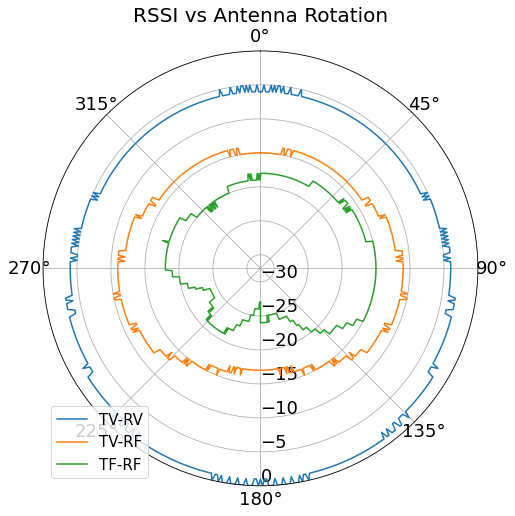

In [15]:
file_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData9/Ex9_RxVertical_TxVertical_FullRecord copy.csv"
rssiVals, time = getTTData(file_path);
timeVV = np.array(time, dtype = 'float')
rssiValsVV = np.array(rssiVals, dtype = 'int')

file_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData9/Ex9_RxFlat_TxVertical_FullRecord copy.csv"
rssiVals, time = getTTData(file_path);
timeFV = np.array(time, dtype = 'float')
rssiValsFV = np.array(rssiVals, dtype = 'int')


file_pathR = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData9/Ex9_RxFlat_TxFlat_rightstart_TT_FullRecord copy.csv"
rssiValsR, timeR = getTTData(file_pathR);

file_pathL = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData9/Ex9_RxFlat_TxFlat_leftstart_TT_FullRecord copy.csv"
rssiValsL, timeL = getTTData(file_pathL);

rssiValsFF =  rssiValsL+ rssiValsR

timeL = np.array(timeL, dtype = 'float');
timeR = np.array(timeR, dtype = 'float');

timeR = timeR - (timeR[0]-timeL[-1])+30

timeFF = np.append(timeL, timeR)
rssiValsFF = np.array(rssiValsFF, dtype = 'int');

anglesVV = calculate_angle(timeVV)
anglesFV = calculate_angle(timeFV)
anglesFF = calculate_angle360(timeFF)


anglesVV = np.append(anglesVV, np.flip(360-anglesVV))
rssiValsVV = np.append(rssiValsVV, np.flip(rssiValsVV))

anglesFV = np.append(anglesFV, np.flip(360-anglesFV))
rssiValsFV = np.append(rssiValsFV, np.flip(rssiValsFV))


maxRssi = max(np.max(rssiValsVV),np.max(rssiValsFV),np.max(rssiValsFF))
minRssi =  min(np.min(rssiValsVV),np.min(rssiValsFV),np.min(rssiValsFF))


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize =(8,8))

ax.plot(np.radians(anglesVV), rssiValsVV-maxRssi, '-', label = 'TV-RV')
ax.plot(np.radians(anglesFV), rssiValsFV-maxRssi, '-', label = 'TV-RF')
anglesFF = np.append(anglesFF,anglesFF[0])
rssiValsFF = np.append(rssiValsFF,rssiValsFF[0])
ax.plot(np.radians(anglesFF), rssiValsFF-maxRssi, '-', label = 'TF-RF')

ax.set_rlabel_position(180)  # Move radial labels away from plotted line

ax.set_theta_direction(-1)  # Make the plot counterclockwise
ax.set_theta_offset(np.radians(90))  # Adjust the starting angle to 0 degrees
# ax.set_rmax(-23)  # Set the maximum radius as needed
# ax.set_rmin(-40)

ax.set_rmax(0)  # Set the maximum radius as needed
ax.set_rmin(-32)
plt.xticks(fontsize = '18')
plt.yticks(fontsize = '18')

plt.title("RSSI vs Antenna Rotation", fontsize = '20')
plt.grid(True)
plt.legend(fontsize = '15', loc='lower left')
plt.show()

## Indoor between rooms

In [16]:
def plotData2(x, y, x2,y2, style = '-o', figure = None, xAxis = "X distance (m)", yAxis = "RSSI", labelName = None, title  = None):

    x_sorted, y_sorted = zip(*sorted(zip(x, y)))
    x_sorted2, y_sorted2 = zip(*sorted(zip(x2, y2)))

    
    plt.figure(figure, figsize=(20,10))
    plt.title(title)
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)
    plt.grid(True)

    plt.plot(x_sorted, y_sorted,style,label = labelName)
    plt.legend()

In [17]:
def displayData2(data):
    estData = getEstimatedDistance(data, 3.8)

    for key in data.keys():
        if key>=100:
            
            plotData(data[key][0],data[key][1], '-o', figure =1, labelName= f"Outside- Tx Height: {key-100}m")
        else:
            plotData(data[key][0],data[key][1], '-o', figure =1, labelName= f"Inside- Tx Height: {key}m")
        plotData(estData[key][0],estData[key][1], '-o', title = "Estimated Distances with LOS", xAxis= "Estimated Distances (m)", labelName= f"Tx Height: {key}m-> Estimate")
    plt.show()


def getEstimatedDistance(data, n):
    estimatedDistances = {}
    for key in data.keys():
        estimatedDistances[key] = [],[]
        i = 0
        for xval in data[key][0]:
            estimatedDistances[key][0].append(estimateDistance(data[key][1][i], n))
            estimatedDistances[key][1].append(data[key][1][i])
            i +=1
    return estimatedDistances




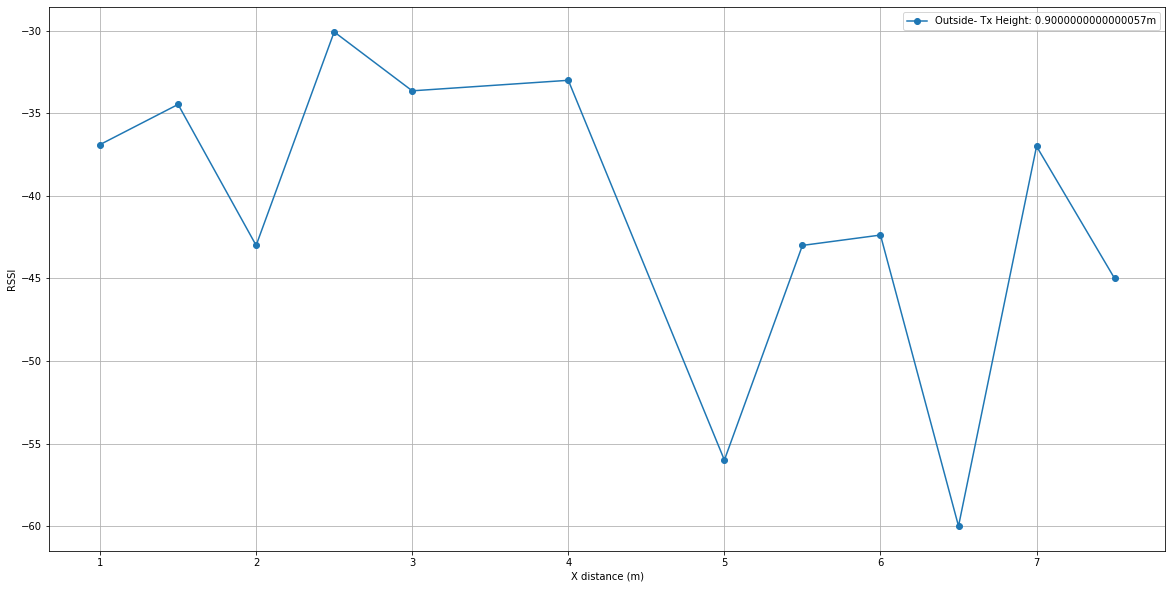

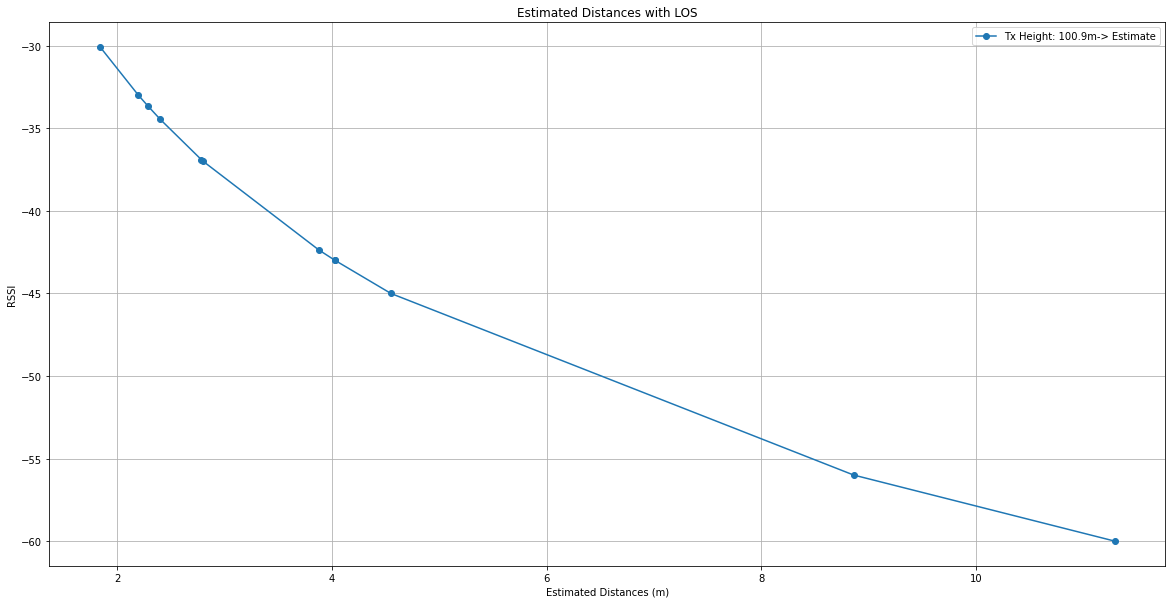

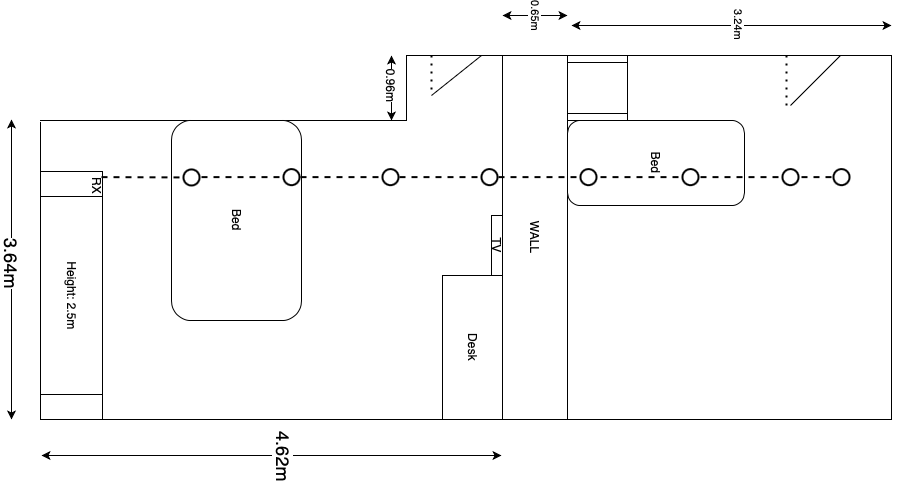

In [18]:
folder_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData13/"

roomData, y_distRx = getData(folder_path)
displayData2(roomData)
# displayData(roomData)
from PIL import Image
from IPython.display import display
image_path = '/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/RoomDiagram.drawio.png'
# Open the image
img = Image.open(image_path)


display(img)


At 5m -> 0.26m away from wall
At 6.5m -> directly beside opening of the door

## Trilateration

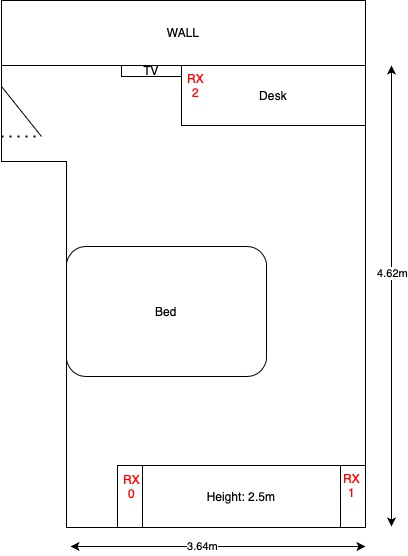

In [19]:
from PIL import Image
from IPython.display import display
image_path = '/Users/benmcpartlin/Desktop/Uni/Year4/Project/Diagrams/Backroom.drawio.jpeg'
# Open the image
img = Image.open(image_path)
display(img)

In [20]:
def getTrilatData(folder_path):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Loop through the CSV files
    
    outputData = {}
    rssiVals = {}

    dic = {}

    # RxNID, TXNID, PacketNo, RSSI
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        with open(file_path, newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader, None)
            x,y,z = file_path.split("(")[-1][:-6].strip(" ").split(",")


            key = (float(x.strip(" ")[1:-1]),float(y.strip(" ")[1:-1])+0.62, float(z.strip(" ")[1:-1]))
            dic[key] = [[],[],[]]

            rx = [[],[],[]] 

            for row in reader:
                if len(row) == 4:
                    rx[int(row[0])].append(int(row[3]))
    
            i = 0
            for l in rx:
                dic[key][i] = int(np.mean(rx[i]))
                i+=1
    return dic
        


In [21]:
trilatData = getTrilatData("/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData14")

rx0 = (0.97,0.62,2.5)
rx1 = (2.9,0.62,2.5)
rx2 = (1.6, 4.32,1.58)



In [22]:

def estimateDistance(rssi, n):
    distance = 10 ** ((-20 - rssi) / (10 * n))
    return distance

distances = {}
n = 3.8
for key in trilatData.keys():
    distances[key] = [0,0,0]
    
    for i in range(3):
        distances[key][i] = round(estimateDistance(trilatData[key][i], n),2)



In [23]:
import numpy as np
from scipy.optimize import minimize

def distance(p1, p2):
    """Calculate the Euclidean distance between two 3D points."""
    return np.linalg.norm(np.array(p1) - np.array(p2))

def objective_function(x, known_points, distances):
    """Objective function for optimization."""
    return sum([(distance(x, known_points[i]) - distances[i])**2 for i in range(len(known_points))])

def trilaterate(known_points, distances):
    """Perform 3D trilateration."""
    initial_guess = np.mean(known_points, axis=0)  # Initial guess as the centroid of known points
    result = minimize(objective_function, initial_guess, args=(known_points, distances), method='Nelder-Mead')
    
    return result.x



/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [24]:
known_points = np.array([rx0, rx1, rx2])

points = {}

for key in distances.keys():
        distancesList = [distances[key][0], distances[key][1], distances[key][2]]

        result = trilaterate(known_points, distancesList)
        points[key] = result


In [25]:
def get2DMeanError(points):

    difference = {}
    diffList = []
    for key in points.keys():
        difference[str(key)] = distance(key[:-1], points[key][:-1])
        diffList.append(difference[str(key)])
    less1 = 0
    bet1n2 = 0
    bet2n3 = 0
    mt3 = 0
    for diff in diffList:
        if diff <1:
            less1+=1
        elif diff < 2:
            bet1n2+=1
        
        elif diff < 3:
            bet2n3+=1
        else:
            mt3 +=1
    return np.mean(diffList), less1/len(diffList), bet1n2/len(diffList), bet2n3/len(diffList), mt3/len(diffList), np.median(diffList),np.std(diffList),sorted(diffList)
    
def get3DMeanError(points):
    difference = {}
    diffList = []
    for key in points.keys():
        difference[str(key)] = distance(key, points[key])
        diffList.append(difference[str(key)])
    return np.mean(diffList)

In [26]:

print(f"Mean Difference 2D: {get2DMeanError(points)}")
print(f"Mean Difference 3D: {get3DMeanError(points)}")


Mean Difference 2D: (1.4920851564778064, 0.3333333333333333, 0.4444444444444444, 0.16666666666666666, 0.05555555555555555, 1.4448459070744262, 0.8377340729884251, [0.26029743299361086, 0.3994058911492228, 0.46283495259430785, 0.5760831944602655, 0.872975575957183, 0.964969998945507, 1.006594341242249, 1.140298499650044, 1.3472821567174011, 1.5424096574314512, 1.7584977419412067, 1.8029473761354062, 1.847181003761215, 1.9422915052794174, 2.2963346725855733, 2.6955101048356385, 2.887399759161134, 3.0542189517596823])
Mean Difference 3D: 2.076866030862027


In [27]:
errors = [[],[],[]]

for key in points.keys():
    pointsDiff = np.array([key]) - np.array([points[key]])
    for i in range(3):
        errors[i].append(pointsDiff[0][i]**2)

avgErrors = []
for eList in errors:
    avgErrors.append(np.mean(eList))

print(avgErrors)

[1.9085080030966357, 1.0196084881305403, 2.36255803898]


In [28]:
def plotPoints(points, both = 0, useRooms = 0, roomsDic = {}, title = ""):
    plt.figure(figsize=(10,10))
    plt.title(title)

    wallThick = 0.125
    lenroom1 = 4.7
    concWallThick = 60


    for key in points.keys():
        xvals, yvals = [],[]
        xvalsEst, yvalsEst = [], []

        xvals.append(key[0])
        yvals.append(key[1])

        xvals.append(points[key][0])
        yvals.append(points[key][1])

        plt.plot(xvals, yvals, "--")

    xvals, yvals = [],[]
    xvalsEst, yvalsEst = [], []

    for key in points.keys():
        xvals.append(key[0])
        yvals.append(key[1])

        xvalsEst.append(points[key][0])
        yvalsEst.append(points[key][1])

    plt.plot(xvals, yvals, "xb", markersize=10, label = "Actual Tx Node")
    plt.plot(xvalsEst, yvalsEst, "om", markersize=7,label = "Estimated Tx Node")
    
    if both == 1:
        plt.axhline(5.27, color='gray', linewidth=0.8) 
        plt.axhline(8.25, color='gray', linewidth=0.8) 
        plt.axhline(0, color='gray', linewidth=0.8) 
        plt.axhline(4.62, color='gray', linewidth=0.8) 
    
        plt.axvline(-0.72, color='gray', linewidth=0.8) 
        plt.axvline(3, color='gray', linewidth=0.8) 


    if useRooms == 1:
        for key in roomsDic.keys():

            plt.plot([roomsDic[key]["xMin"],roomsDic[key]["xMax"]], [roomsDic[key]["yMin"],roomsDic[key]["yMin"]], 'k-')
            plt.plot([roomsDic[key]["xMin"],roomsDic[key]["xMax"]], [roomsDic[key]["yMax"],roomsDic[key]["yMax"]], 'k-')
            
            plt.plot([roomsDic[key]["xMin"],roomsDic[key]["xMin"]], [roomsDic[key]["yMin"],roomsDic[key]["yMax"]], 'k-')
            plt.plot([roomsDic[key]["xMax"],roomsDic[key]["xMax"]], [roomsDic[key]["yMin"],roomsDic[key]["yMax"]], 'k-')

    
    elif useRooms> 1:
        room0 = roomsDic['R0']
        room1 = roomsDic['R1']
        if useRooms == 2:
            for key in roomsDic.keys():
                plt.plot(roomsDic[key][0],roomsDic[key][1], '-k' )
            plt.plot([roomsDic["R1"][0][1], roomsDic["R1"][0][1]], [0, roomsDic["R0"][1][-2]], 'k')
            plt.plot([room1[0][-3], room1[0][-3]], [3+0.63+wallThick,8], 'k')

        elif useRooms == 3:
            room2 = roomsDic['R2']
            room3 = roomsDic['R3']
            bathM = roomsDic['BM']
            for key in roomsDic.keys():
                plt.plot(roomsDic[key][0],roomsDic[key][1], '-k' )
            plt.plot([room2[0][0], room2[0][0]], [room2[1][0], room3[1][-2]], 'k')
            plt.plot([room2[0][1], room2[0][1]], [room2[1][0], room3[1][-2]], 'k')

            plt.plot([room1[0][1], room1[0][1]], [0, room0[1][-2]], 'k')
            plt.plot([room1[0][1], room2[0][1]], [0,0], 'k')
            plt.plot([0, room2[0][0]], [3+0.63+wallThick,3+0.63+wallThick], 'k')
            plt.plot([0, room2[0][0]], [3+0.63+wallThick,3+0.63+wallThick], 'k')
            plt.plot([0, room2[0][0]], [3+0.63+wallThick,3+0.63+wallThick], 'k')
            plt.plot([room2[0][1], room2[0][0]], [bathM[1][2], bathM[1][2]], 'k')

            plt.plot([room1[0][-3], room1[0][-3]], [3+0.63+wallThick,8], 'k')

    colours = ['c', 'g', 'm']
    i = 0
    for point in known_points:
        plt.plot(point[0], point[1], f'xr',markersize=15)
        if i == 2:
            plt.plot(point[0], point[1], f'xr',markersize=15, label = "Rx Nodes")
        i+=1



    plt.xlim(-2.1, 4.5)
    plt.ylim(-2.1, 10.1)

    plt.legend(fontsize = '15');
    plt.xticks(fontsize = '15')
    plt.yticks(fontsize = '15')
    plt.xlabel('x (m)', fontsize = '15')
    plt.ylabel('y (m)', fontsize = '15')
    plt.show()


In [29]:
def checkRoom(point, roomsDic):
    xError = 0.15
    yError = 0.15
    for key in roomsDic:
       
        if point[0]>=roomsDic[key]['xMin']-xError and point[0]<=roomsDic[key]['xMax']+xError:
            if point[1]>=roomsDic[key]['yMin']-yError and point[1]<=roomsDic[key]['yMax']+yError:
                if "E" in key:
                    return key[:-1]
                return key

def estimateRoom(points, roomsDic):

    errorX =[]
    errorY = []
    correct = 0
    total = 0

    errorPoints = {}
    nonePoints = {}

    for key in points.keys():
        total +=1
        guess = checkRoom(points[key], roomsDic)
        actual = checkRoom(key, roomsDic)
        # print(f"Guess: {guess} Actual: {actual}")
        if guess == None or actual == None:
            nonePoints[key] = points[key]
        if guess == None:
            errorX.append(points[key][0])
            errorY.append(points[key][1])
        if actual == None:
            errorX.append(key[0])
            errorY.append(key[1])
        if guess == actual:
            correct +=1
        else:
            errorPoints[key] = points[key]
    print("Accuracy: " ,correct/total)
    return errorPoints, nonePoints

In [30]:
boxDic = {}

In [31]:
plotPoints(points, useRooms=2, roomsDic=roomsDicFirst)
errorPoints, nonePoints = estimateRoom(points, roomsDicAll)

print(f"Mean Difference 2D: {get2DMeanError(points)}")

boxDic['A'] = get2DMeanError(points)[-1]
print(f"Mean Difference 3D: {get3DMeanError(points)}")

NameError: name 'roomsDicFirst' is not defined

In [ ]:
# plt.bar(difference.keys(), difference.values())
# plt.xticks(rotation='vertical');
# plt.title("Distance between estimated location and actual location (m)")
# plt.ylabel("Distance (m)")
# plt.xlabel("Tx position")
# plt.show()

### 2D Trilateration

In [ ]:
known_points_2D = np.array([rx0[:-1], rx1[:-1], rx2[:-1]])

points2D = {}

for key in distances.keys():
        distancesList2D = [distances[key][0], distances[key][1],distances[key][2]]

        result = trilaterate(known_points_2D, distancesList2D)
        points2D[key[:-1]] = result


In [ ]:
difference2D = {}
diffList2D = []
for key in points2D.keys():
    difference2D[str(key)] = distance(key, points2D[key])
    diffList2D.append(difference2D[str(key)])

print(f"Mean Difference: {np.mean(diffList2D)}")

Mean Difference: 1.794412906962853


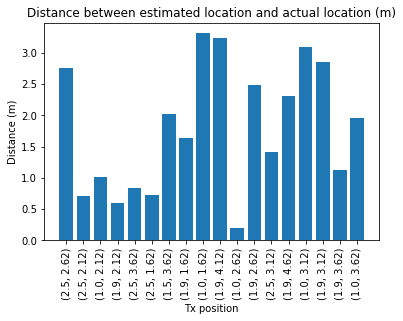

In [ ]:
plt.bar(difference2D.keys(), difference2D.values())
plt.xticks(rotation='vertical');
plt.title("Distance between estimated location and actual location (m)")
plt.ylabel("Distance (m)")
plt.xlabel("Tx position")
plt.show()

[3.1111094086718434, 1.069911088918165]


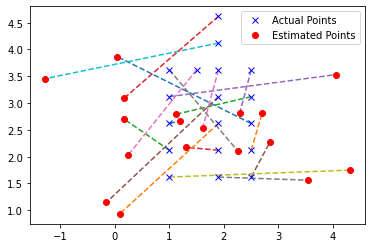

In [ ]:
for key in points2D.keys():
    xvals, yvals = [],[]
    xvalsEst, yvalsEst = [], []

    xvals.append(key[0])
    yvals.append(key[1])

    xvals.append(points2D[key][0])
    yvals.append(points2D[key][1])

    plt.plot(xvals, yvals, "--")

xvals, yvals = [],[]
xvalsEst, yvalsEst = [], []

for key in points2D.keys():
    xvals.append(key[0])
    yvals.append(key[1])

    xvalsEst.append(points2D[key][0])
    yvalsEst.append(points2D[key][1])

plt.plot(xvals, yvals, "xb", label = "Actual Points")
plt.plot(xvalsEst, yvalsEst, "or", label = "Estimated Points")


plt.legend();

errors = [[],[]]

for key in points2D.keys():
    pointsDiff = np.array([key]) - np.array([points2D[key]])
    for i in range(2):
        errors[i].append(pointsDiff[0][i]**2)

avgErrors = []
for eList in errors:
    avgErrors.append(np.mean(eList))

print(avgErrors)

## Experiment 15

In [ ]:
def getTrilatDataNew(folder_path):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Loop through the CSV files
    
    outputData = {}
    rssiVals = {}

    dic = {}

    # RxNID, TXNID, PacketNo, RSSI
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        with open(file_path, newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader, None)
            x,y,z = file_path.split("(")[-1][:-6].strip(" ").split(",")


            key = (float(x.strip(" ")[1:-1]),float(y.strip(" ")[1:-1])+0.62, float(z.strip(" ")[1:-1]))

            # if key[1] >= 5:
            #     key = (round(key[0]-0.72,1), round(key[1],1), round(key[2],1))
                
            dic[key] = [[],[],[]]

            rx = [[],[],[]] 

            for row in reader:
                if len(row) == 4:
                    rx[int(row[0])].append(int(row[3]))
        

            i = 0
            for l in rx:
                dic[key][i] = int(np.mean(rx[i]))
                i+=1
    return dic
        


In [ ]:
trilatData = getTrilatDataNew("/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData15")

rx0 = (1,8,0.73)
rx1 = (2.9,0.62,2.5)
rx2 = (0.96,0.62,2.5)


n = 3.8
distances = {}
for key in trilatData.keys():
    distances[key] = [0,0,0]
    
    for i in range(3):
        distances[key][i] = round(estimateDistance(trilatData[key][i], n),2)

In [ ]:
lenroom1 = 4.7
concWallThick = 60
wallThick = 0.125


room1 = {'xMin':0, 'xMax': 3, 'yMin':0, 'yMax':4.62}
room1 = [[0,3, 3, -0.72, -0.72, 0,0], [0,0,lenroom1,lenroom1,3+0.63+wallThick,3+0.63+wallThick,0]]


room2 = {'xMax':-1.6-wallThick*2, 'xMin':-1.6-wallThick*2-4.3 , 'yMin':0, 'yMax':2.9}
xList = [-1.6-wallThick*2,-1.6-wallThick*2-4.3,-1.6-wallThick*2-4.3, -1.6-wallThick*2-0.87, -1.6-wallThick*2-0.87 , -1.6-wallThick*2,  -1.6-wallThick*2]
yList = [0,0,2.9,2.9,4.7+wallThick,4.7+wallThick,0]
room2 = [xList,yList]


room3 = {'xMax':-1.6-wallThick*2, 'xMin': -1.6-wallThick*2-4.3, 'yMin':2.9+1.8+0.59+wallThick, 'yMax':2.9+1.8+0.59+wallThick+3.2}

xList = [room3['xMin'], room3['xMax'], room3['xMax'],  room3['xMin'], room3['xMin']]
yList = [room3['yMin'], room3['yMin'], room3['yMax'], room3['yMax'], room3['yMin']]
room3 = [xList, yList]


room0 = {'xMin':-0.72, 'xMax': -0.72+3.72, 'yMin':lenroom1+0.65, 'yMax':lenroom1+0.65+3.24}
xList = [room0['xMin'], room0['xMax'], room0['xMax'],  room0['xMin'], room0['xMin']]
yList = [room0['yMin'], room0['yMin'], room0['yMax'], room0['yMax'], room0['yMin']]
room0 = [xList, yList]


bathM = {'xMax':-1.6-wallThick*3-0.87, 'xMin': -1.6-wallThick*2-4.3, 'yMin':2.9+wallThick, 'yMax':2.9+wallThick+1.8}
xList = [bathM['xMin'], bathM['xMax'], bathM['xMax'],  bathM['xMin'], bathM['xMin']]
yList = [bathM['yMin'], bathM['yMin'], bathM['yMax'], bathM['yMax'], bathM['yMin']]
bathM = [xList, yList]

bathL = {'xMax':-wallThick, 'xMin':-wallThick-1.6, 'yMin':1.8+wallThick, 'yMax':1.8+wallThick+1.65}
xList = [bathL['xMin'], bathL['xMax'], bathL['xMax'],  bathL['xMin'], bathL['xMin']]
yList = [bathL['yMin'], bathL['yMin'], bathL['yMax'], bathL['yMax'], bathL['yMin']]
bathL = [xList, yList]

bathB = {'xMax':-wallThick, 'xMin':-wallThick-1.6, 'yMin':0, 'yMax':1.8}
xList = [bathB['xMin'], bathB['xMax'], bathB['xMax'],  bathB['xMin'], bathB['xMin']]
yList = [bathB['yMin'], bathB['yMin'],bathB['yMax'], bathB['yMax'], bathB['yMin']]
bathB = [xList, yList]
roomsDicFirst ={"R1": room1,"R0":room0}



In [ ]:
xCoord = []
yCoord = []

for key in trilatData.keys():
    xCoord.append(key[0])
    yCoord.append(key[1])

In [ ]:
known_points = np.array([rx0, rx1, rx2])
        
points = {}

for key in distances.keys():
        distancesList = [distances[key][0], distances[key][1], distances[key][2]]

        result = trilaterate(known_points, distancesList)
        points[key] = result

In [ ]:
difference = {}
diffList = []
for key in points.keys():
    difference[str(key)] = distance(key[:-1], points[key][:-1])
    diffList.append(difference[str(key)])

print(f"Mean Difference: {np.mean(diffList)}")

lessCount = 0
moreCount = 0

for diff in diffList:
    if diff < 2:
        lessCount+=1
    
    if diff > 3:
        moreCount+=1

print(lessCount/len(diffList))

print(moreCount/len(diffList))

Mean Difference: 1.9559264103142153
0.7619047619047619
0.14285714285714285


In [ ]:
def checkRoom(point, roomsDic):
    xError = 0.15
    yError = 0.15
    for key in roomsDic:
       
        if point[0]>=roomsDic[key]['xMin']-xError and point[0]<=roomsDic[key]['xMax']+xError:
            if point[1]>=roomsDic[key]['yMin']-yError and point[1]<=roomsDic[key]['yMax']+yError:
                if "E" in key:
                    return key[:-1]
                return key

def estimateRoom(points, roomsDic):

    errorX =[]
    errorY = []
    correct = 0
    total = 0

    errorPoints = {}
    nonePoints = {}

    for key in points.keys():
        total +=1
        guess = checkRoom(points[key], roomsDic)
        actual = checkRoom(key, roomsDic)
        # print(f"Guess: {guess} Actual: {actual}")
        if guess == None or actual == None:
            nonePoints[key] = points[key]
        if guess == None:
            errorX.append(points[key][0])
            errorY.append(points[key][1])
        if actual == None:
            errorX.append(key[0])
            errorY.append(key[1])
        if guess == actual:
            correct +=1
        else:
            errorPoints[key] = points[key]
    print("Accuracy: " ,correct/total)
    return errorPoints, nonePoints

In [ ]:

wallThick = 0.125

room1 = {'xMin':0, 'xMax': 3, 'yMin':0, 'yMax':4.62}
room2 = {'xMax':-1.6-wallThick*2, 'xMin':-1.6-wallThick*2-4.3 , 'yMin':0, 'yMax':2.9}
room3 = {'xMax':-1.6-wallThick*2, 'xMin': -1.6-wallThick*2-4.3, 'yMin':2.9+1.8+0.59+wallThick, 'yMax':2.9+1.8+0.59+wallThick+3.2}
room0 = {'xMin':-0.72, 'xMax': -0.72+3.72, 'yMin':4.62+0.65, 'yMax':4.62+0.65+3.24}

room2Extra = {'yMin':2.9, 'yMax':2.9+wallThick+1.8,'xMin':-1.6-wallThick*2-0.87,'xMax':-1.6-wallThick*2  }

room1Extra = {'xMin':-0.72, 'xMax':0, 'yMin':1.8+1.65+wallThick*2, 'yMax':4.62}

bathM = {'xMax':-1.6-wallThick*3-0.87, 'xMin': -1.6-wallThick*2-4.3, 'yMin':2.9+wallThick, 'yMax':2.9+wallThick+1.8}
bathL = {'xMax':-wallThick, 'xMin':-wallThick-1.6, 'yMin':1.8+wallThick, 'yMax':1.8+wallThick+1.65}
bathB = {'xMax':-wallThick, 'xMin':-wallThick-1.6, 'yMin':0, 'yMax':1.8}


def setRoomsParams(roomsDic): 

    for room in roomsDic.keys():
        for key in roomsDic[room].keys():
            roomsDic[room][key] = round(roomsDic[room][key],2)
    return roomsDic

roomsDic1 = setRoomsParams({"R1": room1})
roomsDic2 = setRoomsParams({"R1": room1,"R0":room0})


roomsDicAll = setRoomsParams({"R1": room1, "R2": room2, "R3":room3, 
                            "R0":room0, "BM": bathM, "BL": bathL, "BB": bathB, "R2E":room2Extra, "R1E":room1Extra })
print(roomsDicAll)

{'R1': {'xMin': 0, 'xMax': 3, 'yMin': 0, 'yMax': 4.62}, 'R2': {'xMax': -1.85, 'xMin': -6.15, 'yMin': 0, 'yMax': 2.9}, 'R3': {'xMax': -1.85, 'xMin': -6.15, 'yMin': 5.42, 'yMax': 8.62}, 'R0': {'xMin': -0.72, 'xMax': 3.0, 'yMin': 5.27, 'yMax': 8.51}, 'BM': {'xMax': -2.85, 'xMin': -6.15, 'yMin': 3.02, 'yMax': 4.83}, 'BL': {'xMax': -0.12, 'xMin': -1.73, 'yMin': 1.93, 'yMax': 3.58}, 'BB': {'xMax': -0.12, 'xMin': -1.73, 'yMin': 0, 'yMax': 1.8}, 'R2E': {'yMin': 2.9, 'yMax': 4.83, 'xMin': -2.72, 'xMax': -1.85}, 'R1E': {'xMin': -0.72, 'xMax': 0, 'yMin': 3.7, 'yMax': 4.62}}


{'R1': [[0, 3, 3, -0.72, -0.72, 0, 0], [0, 0, 4.7, 4.7, 3.755, 3.755, 0]], 'R0': [[-0.72, 3.0, 3.0, -0.72, -0.72], [5.3500000000000005, 5.3500000000000005, 8.59, 8.59, 5.3500000000000005]]}


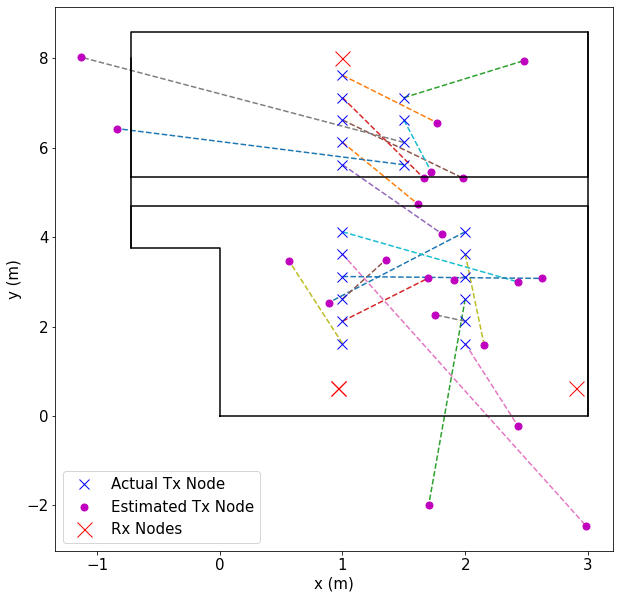

Mean Difference 2D: (1.9559264103142153, 0.14285714285714285, 0.6190476190476191, 0.09523809523809523, 0.14285714285714285, 1.7517648026068589, 1.355188231444262, [0.11838793967444691, 0.28310345174447027, 0.9370258403603448, 1.1816831082884423, 1.1871560171565572, 1.2838718628676882, 1.314368369056537, 1.5209988927590223, 1.6250613506994656, 1.6298335855690014, 1.7517648026068589, 1.8124238327910824, 1.895922329691148, 1.899652794503022, 1.9126356705748861, 1.9334640548400408, 2.0378462351065023, 2.4711163075657447, 3.251333208156538, 4.629488606058578, 6.397316356528143])
Mean Difference 3D: 2.3916973482620776
Accuracy:  0.7142857142857143


In [ ]:
print(roomsDicFirst)

plotPoints(points, useRooms=2, roomsDic = roomsDicFirst)

print(f"Mean Difference 2D: {get2DMeanError(points)}")
print(f"Mean Difference 3D: {get3DMeanError(points)}")
boxDic['B'] = get2DMeanError(points)[-1]

errorPoints, nonePoints = estimateRoom(points, roomsDic2)
# plotPoints(errorPoints, useRooms=2, roomsDic = roomsDicFirst)

## Experiment 16

In [ ]:
def getTrilatData16(folder_path):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Loop through the CSV files
    
    outputData = {}
    rssiVals = {}

    dic = {}

    # RxNID, TXNID, PacketNo, RSSI
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        with open(file_path, newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader, None)
            x,y,z = file_path.split("(")[-1][:-6].strip(" ").split(",")


            key = (float(x.strip(" ")[1:-1]),float(y.strip(" ")[1:-1])+0.62, float(z.strip(" ")[1:-1]))

            if key[1] > 5:
                key = (round(key[0]-0.72,1), round(key[1],1), round(key[2],1))
            else:
                key = (round(key[0],1), round(key[1],1), round(key[2],1))
            dic[key] = [[],[],[]]

            rx = [[],[],[]] 

            for row in reader:
                if len(row) == 4:
                    rx[int(row[0])].append(int(row[3]))
        

            i = 0
            for l in rx:
                dic[key][i] = int(np.mean(rx[i]))
                i+=1
    return dic

In [ ]:
trilatData = getTrilatData16("/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData16")

rx0 = (1.85-0.72,7.95,1.65)
rx1 = (1.39,0.62,2.5)
rx2 = (-0.64-0.72,3.7+2.2,1.2)

known_points = np.array([rx0, rx1, rx2])


In [ ]:
n = 3.8
distances = {}
for key in trilatData.keys():
    distances[key] = [0,0,0]
    
    for i in range(3):
        distances[key][i] = round(estimateDistance(trilatData[key][i], n),2)

Mean Difference: 2.9989852913907296
Mean Difference 2D: (2.9989852913907296, 0.0, 0.23076923076923078, 0.46153846153846156, 0.3076923076923077, 2.442360546764953, 1.5761693683703666, [1.1833355010902173, 1.354294610401936, 1.675634192587807, 2.1116771723387058, 2.2588555077228905, 2.3349577568928135, 2.442360546764953, 2.7009336688153525, 2.7885910336674753, 3.82183055766429, 3.987122845512344, 5.5974599250361745, 6.729755469584529])
Mean Difference 3D: 3.328854525322964
0.23076923076923078
0.3076923076923077


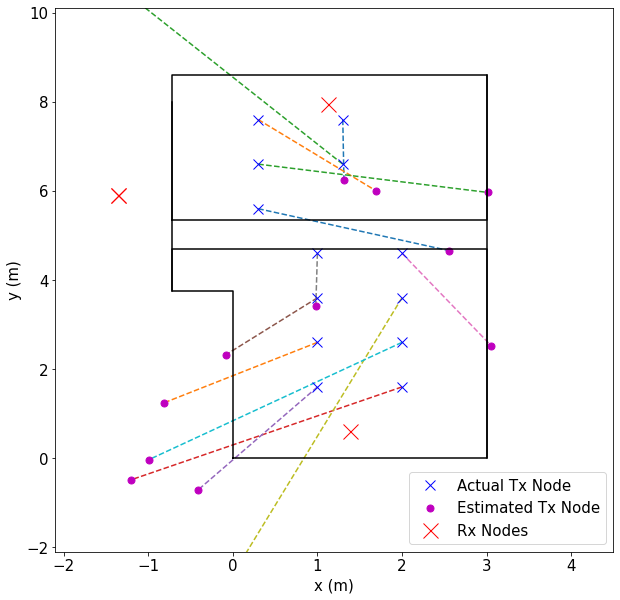

Accuracy:  0.46153846153846156


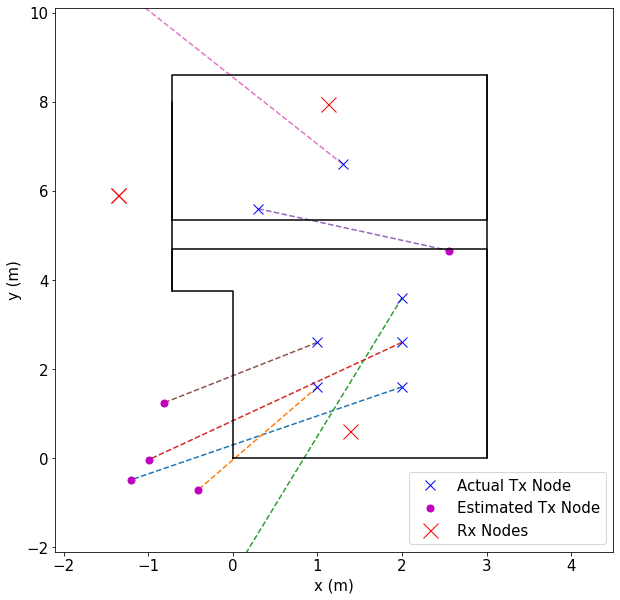

In [ ]:
points = {}

for key in distances.keys():
        distancesList = [distances[key][0], distances[key][1], distances[key][2]]

        result = trilaterate(known_points, distancesList)
        points[key] = result

difference = {}
diffList = []
for key in points.keys():
    difference[str(key)] = distance(key[:-1], points[key][:-1])
    diffList.append(difference[str(key)])

print(f"Mean Difference: {np.mean(diffList)}")

print(f"Mean Difference 2D: {get2DMeanError(points)}")
boxDic['C'] = get2DMeanError(points)[-1]

print(f"Mean Difference 3D: {get3DMeanError(points)}")

lessCount = 0
moreCount = 0

for diff in diffList:
    if diff < 2:
        lessCount+=1
    
    if diff > 3:
        moreCount+=1

print(lessCount/len(diffList))

print(moreCount/len(diffList))


plotPoints(points, useRooms=2, roomsDic = roomsDicFirst)
errorPoints, nonePoints = estimateRoom(points, roomsDic2)
plotPoints(errorPoints, useRooms=2, roomsDic = roomsDicFirst)


## Multilateration

In [ ]:
import numpy as np
from scipy.optimize import minimize

def distance(p1, p2):
    """Calculate the Euclidean distance between two 3D points."""
    return np.linalg.norm(np.array(p1) - np.array(p2))

def objective_function(x, known_points, distances):
    """Objective function for optimization."""
    return sum([(distance(x, known_points[i]) - distances[i])**2 for i in range(len(known_points))])

def multilaterate(known_points, distances):
    """Perform 3D trilateration."""
    initial_guess = np.mean(known_points, axis=0)  # Initial guess as the centroid of known points
    result = minimize(objective_function, initial_guess, args=(known_points, distances), method='Nelder-Mead')
    
    return result.x



In [ ]:
def getMultiData(folder_path):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Loop through the CSV files
    
    outputData = {}
    rssiVals = {}

    dic = {}
    rxRssiDic = {}

    # RxNID, TXNID, PacketNo, RSSI
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        with open(file_path, newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader, None)
            x,y,z = file_path.split("(")[-1][:-6].strip(" ").split(",")

            key = (float(x.strip(" ")[1:-1]),float(y.strip(" ")[1:-1])+0.62, float(z.strip(" ")[1:-1]))

            if key[1] >= 5:
                key = (round(key[0]-0.72,1), round(key[1],1), round(key[2],1))
                
            dic[key] = [[],[],[],[]]

            rx = [[],[],[],[]] 
            rxRssiDic[key] = {}
            noRx = 4
            for i in range(noRx):
                rxRssiDic[key][i] = []
                for j in range(noRx):
                    rxRssiDic[key][i].append(j)
            
            
            for row in reader:
                if len(row) == 5:
                    rx[int(row[0])].append(int(row[3]))
                    rxRssiDic[key][int(row[0])]  = []
                    r4 = row[4].strip("[").strip("]").split(", ")

                    for r in r4:
                        if r[1:-1] != '':

                            rxRssiDic[key][int(row[0])].append(int(r[1:-1]))
                        else:
                            rxRssiDic[key][int(row[0])].append(int(r))


            
            i = 0
            for l in rx:
                dic[key][i] = int(np.mean(rx[i]))
                i+=1
    return dic, rxRssiDic

In [ ]:
multiData, rxRssiDic = getMultiData("/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData17")

# print(multiData)

In [ ]:
rx0 = (1.7-0.72,8-0.4+0.65,1.73)
rx1 = (2.85,0.62,2.5)
rx2 = (1.1,0.62,2.5)
rx3 = (-0.67-0.72,2.2+3.1+0.62,1.2)

known_points = np.array([rx0, rx1, rx2, rx3])

In [ ]:
def estimateN(distance, rssi):
    n = (-20 - rssi) / (10 *np.log10(distance))
    return n

In [ ]:
def knownNValues(known_points, rxRssiDic):

    knownDistances = {}

    for i, point in enumerate(known_points):
        knownDistances[i] = []

        for j in range(len(known_points)):
            if i == j:
                knownDistances[i].append(0)
            else:
                knownDistances[i].append(round(distance(point, known_points[j]), 2))

    nDic = {}
    for key in rxRssiDic.keys():
        nDic[key] = {}
        for i in range(len(rxRssiDic[key])):
            nDic[key][i] = []
            for j in range(4):
                if i!=j:
                    nDic[key][i].append(round(estimateN(knownDistances[i][j], rxRssiDic[key][i][j]),2))
                else:
                    nDic[key][i].append(0)

    # 0 1 
    # 0 2
    # 0 3
    # 1 2 
    # 1 3 
    # 2 3

    possibilities = [(0,1), (0,2), (0,3), (1,2),(1,3),(2,3)]

    nDicS = {}
    for key in nDic.keys():
        for i in range(len(nDic[key].keys())):
            for j in range(len(nDic[key].keys())):
                if (i,j) in possibilities:
                    if (i,j) not in nDicS.keys():
                        nDicS[(i,j)] = [nDic[key][i][j]]
                    else:
                        nDicS[(i,j)].append(nDic[key][i][j])
    overallN = []
    for key in nDicS.keys():
        print(key, sorted(nDicS[key]))
        # print(key, (nDicS[key]))
        print(f"Mean: {round(np.mean(nDicS[key]),2)} | Median: {np.median(nDicS[key])} | SD: {round(np.std(nDicS[key]),2)}")
        coordsDiff = []
        for i in range(3):
            coordsDiff.append(abs(round(known_points[key[0]][i] - known_points[key[1]][i],2)))

        print(f"Diff = {coordsDiff}\n")    
        # print(f"Rx{key[0]}: {known_points[key[0]]} | Rx{key[1]}: {known_points[key[1]]}\n")
    
        for nVal in nDicS[key]:
            overallN.append(nVal)

    print(f"Overall | Mean: {round(np.mean(overallN),2)} | Median: {np.median(overallN)} | SD: {round(np.std(overallN),2)}|")
    return nDicS, 


In [ ]:
print(rxRssiDic)

{(1.0, 2.62, 0.75): {0: [0, -58, -62, -36], 1: [-58, 120, -34, -53], 2: [-61, -35, 0, -42], 3: [-36, -53, -42, 0]}, (1.0, 4.12, 0.94): {0: [0, -58, -60, -37], 1: [-58, 120, -36, -52], 2: [-60, -37, 0, -42], 3: [-37, -52, -42, 0]}, (2.0, 2.62, 0.75): {0: [0, -57, -60, -36], 1: [-57, 120, -34, -54], 2: [-60, -35, 0, -42], 3: [-36, -54, -42, 0]}, (2.5, 3.62, 1.0): {0: [0, -54, -60, -36], 1: [-54, 120, -28, -54], 2: [-59, -29, 0, -43], 3: [-36, -55, -43, 0]}, (2.0, 3.62, 0.75): {0: [0, -58, -61, -36], 1: [-58, 120, -37, -52], 2: [-60, -38, 0, -42], 3: [-36, -52, -42, 0]}, (1.0, 3.62, 0.75): {0: [0, -60, -59, -36], 1: [-60, 120, -36, -52], 2: [-58, -37, 0, -42], 3: [-36, -53, -42, 0]}, (2.1, 6.8, 1.3): {0: [0, -52, -66, -36], 1: [-52, 120, -28, -51], 2: [-65, -29, 0, -43], 3: [-36, -52, -43, 0]}, (1.0, 3.12, 0.75): {0: [0, -54, -60, -37], 1: [-54, 120, -37, -53], 2: [-60, -38, 0, -42], 3: [-36, -53, -42, 0]}, (1.0, 1.62, 0.75): {0: [0, -56, -58, -36], 1: [-55, 120, -36, -51], 2: [-58, -36, 

In [ ]:
nDic = knownNValues(known_points, rxRssiDic)

(0, 1) [3.34, 3.57, 3.57, 3.57, 3.57, 3.57, 3.68, 3.68, 3.68, 3.68, 3.79, 3.79, 3.79, 3.79, 3.79, 3.79, 3.79, 3.79, 3.79, 3.79, 3.79, 4.01, 4.12, 4.24, 4.24, 4.24, 4.24, 4.24, 4.35, 4.46]
Mean: 3.86 | Median: 3.79 | SD: 0.28
Diff = [1.87, 7.63, 0.77]

(0, 2) [4.07, 4.07, 4.29, 4.29, 4.29, 4.41, 4.52, 4.52, 4.52, 4.52, 4.52, 4.52, 4.52, 4.52, 4.52, 4.52, 4.52, 4.52, 4.63, 4.63, 4.63, 4.63, 4.75, 4.75, 4.75, 4.75, 4.97, 5.09, 5.2, 5.31]
Mean: 4.59 | Median: 4.52 | SD: 0.28
Diff = [0.12, 7.63, 0.77]

(0, 3) [3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03, 3.22, 3.22, 3.22, 3.22, 3.22, 3.22, 3.41, 3.98]
Mean: 3.11 | Median: 3.03 | SD: 0.19
Diff = [2.37, 2.33, 0.53]

(1, 2) [2.88, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.7, 5.76, 5.76, 6.17, 6.58, 6.58, 6.58, 6.99, 6.99, 6.99]
Mean: 4.25 | Median: 3.29 | SD: 1.49
Diff = [1.75, 0.0, 0.

In [ ]:
distances = {}
n = 3.8
nNodes = 4
for key in multiData.keys():
    distances[key] = [0,0,0,0]
    
    for i in range(nNodes):
        distances[key][i] = round(estimateDistance(multiData[key][i], n),2)

Mean Difference: 2.5706070706955897
Mean Difference 2D: (2.5706070706955897, 0.2, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 2.0323946587426933, 1.799956933825298, [0.4428820897701685, 0.47838904417316186, 0.527639568570854, 0.6169342010004997, 0.8471127335559919, 0.8849785339519192, 1.0528439460501038, 1.262571014888816, 1.4751803036569349, 1.4807613819957544, 1.7403693724202378, 1.8936656768019529, 1.9103953158841527, 1.9336605306696846, 2.007780438707564, 2.0570088787778227, 2.062884147100108, 2.197433652555911, 2.25863846030992, 2.4952949225228336, 2.7973148341394123, 2.8221763782684404, 3.164387385619856, 4.466691308840069, 4.475942367757459, 5.721041034674353, 5.858275077847533, 5.957444874301775, 6.068721627076214, 6.1597930189781955])
Mean Difference 3D: 3.258276369073115
0.4666666666666667
0.26666666666666666


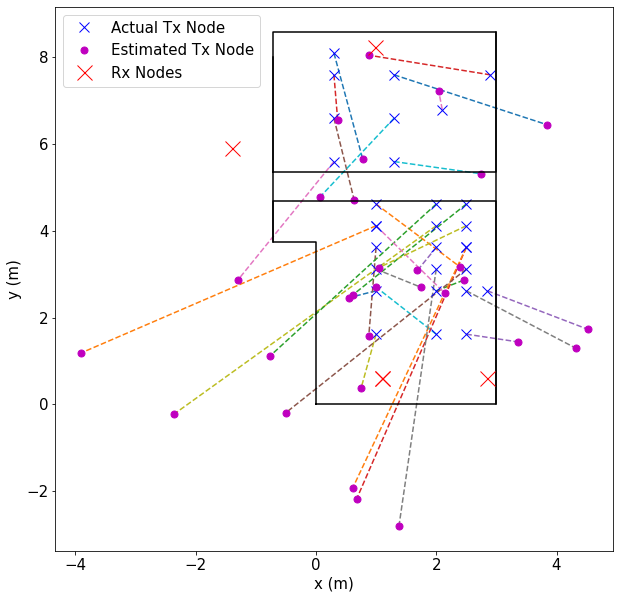

Accuracy:  0.5333333333333333


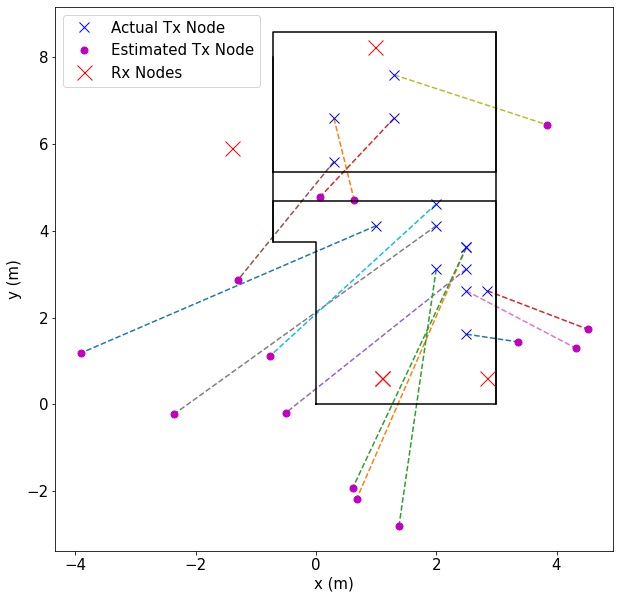

In [ ]:
points = {}

for key in distances.keys():
    distancesList = []
    for i in range(nNodes):
        distancesList.append(distances[key][i])

    result = multilaterate(known_points, distancesList)
    points[key] = result

difference = {}
diffList = []
for key in points.keys():
    difference[str(key)] = distance(key[:-1], points[key][:-1])
    diffList.append(difference[str(key)])

print(f"Mean Difference: {np.mean(diffList)}")
print(f"Mean Difference 2D: {get2DMeanError(points)}")
boxDic['D'] = get2DMeanError(points)[-1]



print(f"Mean Difference 3D: {get3DMeanError(points)}")

lessCount = 0
moreCount = 0

for diff in diffList:
    if diff < 2:
        lessCount+=1
    
    if diff > 3:
        moreCount+=1

print(lessCount/len(diffList))

print(moreCount/len(diffList))

plotPoints(points, useRooms=2, roomsDic = roomsDicFirst)

errorPoints, nonePoints = estimateRoom(points, roomsDic2)
plotPoints(errorPoints, useRooms=2, roomsDic = roomsDicFirst)


## Experiment 18

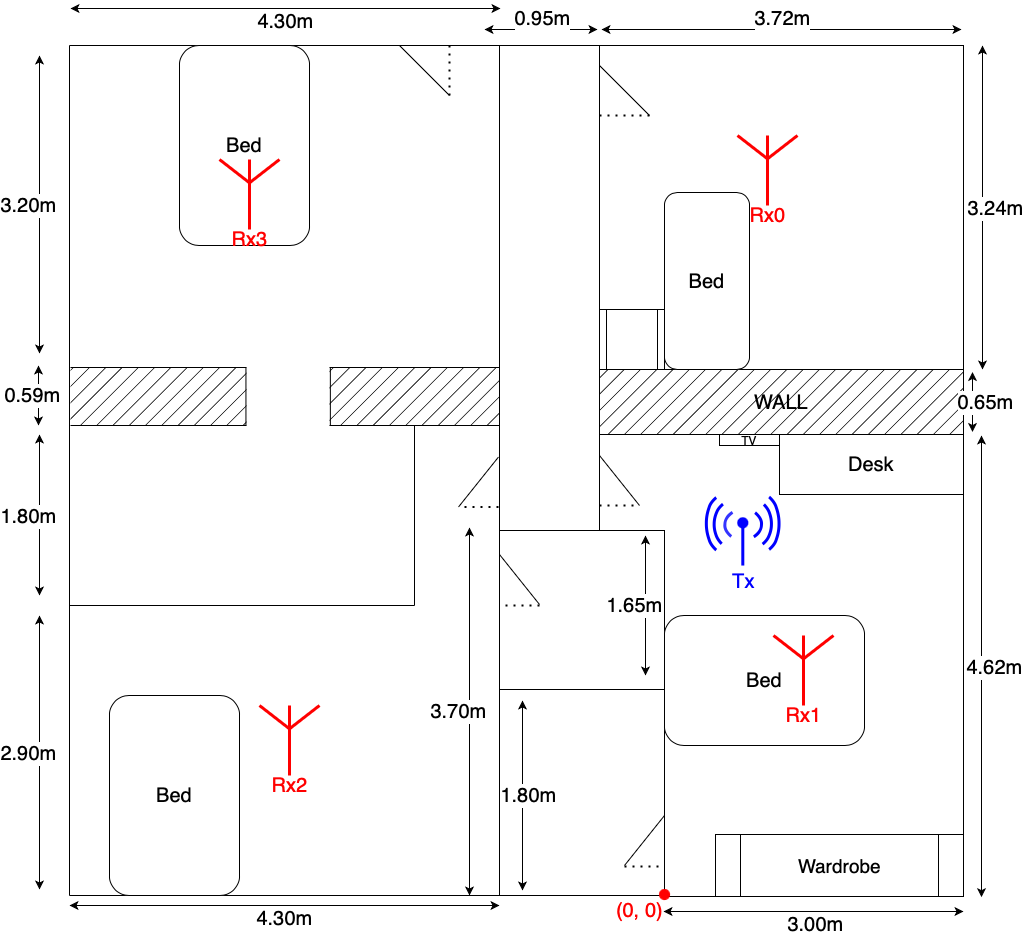

In [ ]:
from PIL import Image
from IPython.display import display
image_path = '/Users/benmcpartlin/Desktop/Uni/Year4/Project/Diagrams/WholeUpstairs.drawio.png'
# Open the image
img = Image.open(image_path)


display(img)

In [ ]:
wallThick = 0.125

def getMultiData18(folder_path):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Loop through the CSV files
    
    outputData = {}
    rssiVals = {}

    dic = {}
    rxRssiDic = {}

    # RxNID, TXNID, PacketNo, RSSI
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        with open(file_path, newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader, None)

            splitLine = file_path.split("_")

            
            if len(splitLine) ==3:
                x,y,z = splitLine[2].split("(")[-1][:-6].strip(" ").split(",")
            else:
                x,y,z = splitLine[2].split("(")[-1][:-2].strip(" ").split(",")

            key = (float(x.strip(" ")[1:-1]),float(y.strip(" ")[1:-1])+0.63, float(z.strip(" ")[1:-1]))

            if len(splitLine) > 3:
                if splitLine[3][:-4] == 'Cell':
                    key = (round(key[0]-0.72,3), round(key[1],3)+4.62+0.65, round(key[2],3))
                    
                elif splitLine[3][:-4] == 'Lucy':
                    key = (round(-key[0]-1.6-wallThick*2,3), round(key[1],3), round(key[2],3))
                
                elif splitLine[3][:-4] == 'BathL':
                    key = (round(-key[0]-wallThick,3), round(key[1],3)+1.8+wallThick, round(key[2],3))

                elif splitLine[3][:-4] == 'Master':
                    key = (round(-key[0]-1.6-wallThick*2,3), round(key[1],3)+2.9+1.8+0.59+wallThick, round(key[2],3))

                elif splitLine[3][:-4] == 'BathM':
                    key = (round(-key[0]-1.6-wallThick*3-0.87,3), round(key[1],3)+2.9+wallThick, round(key[2],3))

            dic[key] = [[],[],[],[]]

            rx = [[],[],[],[]] 
            rxRssiDic[key] = {}
            noRx = 4
            for i in range(noRx):
                rxRssiDic[key][i] = []
                for j in range(noRx):
                    rxRssiDic[key][i].append(j)
            
            
            for row in reader:
                if len(row) == 5:
                    rx[int(row[0])].append(int(row[3]))
                    rxRssiDic[key][int(row[0])]  = []
                    r4 = row[4].strip("[").strip("]").split(", ")

                    for r in r4:
                        if r[1:-1] != '':

                            rxRssiDic[key][int(row[0])].append(int(r[1:-1]))
                        else:
                            rxRssiDic[key][int(row[0])].append(int(r))
            
            i = 0
            for l in rx:
                dic[key][i] = int(np.mean(rx[i]))
                i+=1
    return dic, rxRssiDic

multiData, rxRssiDic = getMultiData18("/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData18")


In [ ]:
rx0 = (1.26, 1.95, 2.1)
rx0 = (rx0[0]-0.72, rx0[1]+4.62+0.65, rx0[2])

rx1 = (1.3,1.7,2.1)

rx2 = (2.15,1.56,2.1)
rx2 = (-rx2[0]-1.6-wallThick*2, rx2[1], rx2[2])

rx3 = (2.32, 1.9, 1.75)
rx3 = (-rx3[0]-1.6-wallThick*2, rx3[1]+2.9+1.8+0.59+wallThick, rx3[2])
known_points = np.array([rx0, rx1, rx2, rx3])

In [ ]:
distances = {}
n = 3.8
nNodes = 4
for key in multiData.keys():
    distances[key] = [0,0,0,0]
    
    for i in range(nNodes):
        distances[key][i] = round(estimateDistance(multiData[key][i], n),2)

In [ ]:
wallThick = 0.125

lenroom1 = 4.7
concWallThick = 60


room1 = {'xMin':0, 'xMax': 3, 'yMin':0, 'yMax':4.62}
room1 = [[0,3, 3, -0.72, -0.72, 0,0], [0,0,lenroom1,lenroom1,3+0.63+wallThick,3+0.63+wallThick,0]]


room2 = {'xMax':-1.6-wallThick*2, 'xMin':-1.6-wallThick*2-4.3 , 'yMin':0, 'yMax':2.9}
xList = [-1.6-wallThick*2,-1.6-wallThick*2-4.3,-1.6-wallThick*2-4.3, -1.6-wallThick*2-0.87, -1.6-wallThick*2-0.87 , -1.6-wallThick*2,  -1.6-wallThick*2]
yList = [0,0,2.9,2.9,4.7+wallThick,4.7+wallThick,0]
room2 = [xList,yList]


room3 = {'xMax':-1.6-wallThick*2, 'xMin': -1.6-wallThick*2-4.3, 'yMin':2.9+1.8+0.59+wallThick, 'yMax':2.9+1.8+0.59+wallThick+3.2}

xList = [room3['xMin'], room3['xMax'], room3['xMax'],  room3['xMin'], room3['xMin']]
yList = [room3['yMin'], room3['yMin'], room3['yMax'], room3['yMax'], room3['yMin']]
room3 = [xList, yList]


room0 = {'xMin':-0.72, 'xMax': -0.72+3.72, 'yMin':lenroom1+0.65, 'yMax':lenroom1+0.65+3.24}
xList = [room0['xMin'], room0['xMax'], room0['xMax'],  room0['xMin'], room0['xMin']]
yList = [room0['yMin'], room0['yMin'], room0['yMax'], room0['yMax'], room0['yMin']]
room0 = [xList, yList]


bathM = {'xMax':-1.6-wallThick*3-0.87, 'xMin': -1.6-wallThick*2-4.3, 'yMin':2.9+wallThick, 'yMax':2.9+wallThick+1.8}
xList = [bathM['xMin'], bathM['xMax'], bathM['xMax'],  bathM['xMin'], bathM['xMin']]
yList = [bathM['yMin'], bathM['yMin'], bathM['yMax'], bathM['yMax'], bathM['yMin']]
bathM = [xList, yList]

bathL = {'xMax':-wallThick, 'xMin':-wallThick-1.6, 'yMin':1.8+wallThick, 'yMax':1.8+wallThick+1.65}
xList = [bathL['xMin'], bathL['xMax'], bathL['xMax'],  bathL['xMin'], bathL['xMin']]
yList = [bathL['yMin'], bathL['yMin'], bathL['yMax'], bathL['yMax'], bathL['yMin']]
bathL = [xList, yList]

bathB = {'xMax':-wallThick, 'xMin':-wallThick-1.6, 'yMin':0, 'yMax':1.8}
xList = [bathB['xMin'], bathB['xMax'], bathB['xMax'],  bathB['xMin'], bathB['xMin']]
yList = [bathB['yMin'], bathB['yMin'],bathB['yMax'], bathB['yMax'], bathB['yMin']]
bathB = [xList, yList]

roomsDicNew = {"R1": room1, "R2": room2, "R3":room3, "R0":room0, "BM": bathM, "BL": bathL, "BB": bathB }


Mean Difference: 1.8647043276915736
Mean Difference 2D: (1.8647043276915736, 0.15, 0.4, 0.35, 0.1, 1.9078987580702134, 0.8495457438750968, [0.17391367129402133, 0.6077266430211405, 0.7331509863565444, 1.0286691819461085, 1.0746708364725965, 1.0807360889384219, 1.6376951641635737, 1.7390971952299359, 1.7692623261707727, 1.8298808041994439, 1.9859167119409828, 2.1133624098907435, 2.1860191836503797, 2.231528169977975, 2.304489294327225, 2.7394409201645042, 2.740521554231291, 2.9519747251076085, 3.151135181961157, 3.2148955047870458])
Mean Difference 3D: 2.6537464010717224


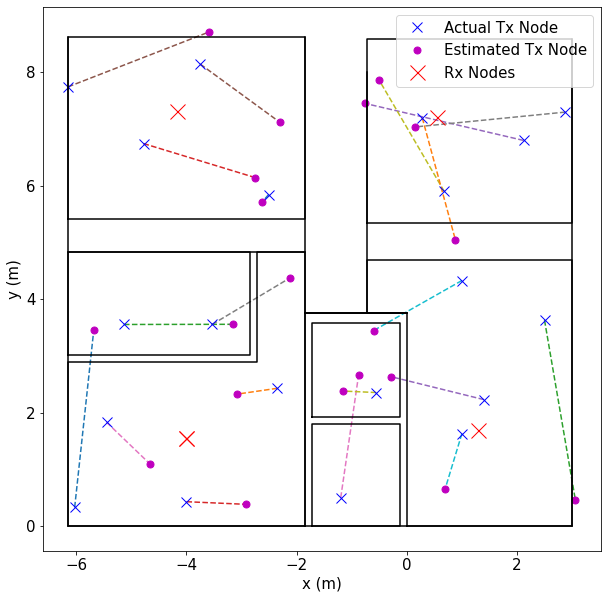

In [ ]:
points = {}

for key in distances.keys():
    distancesList = []
    for i in range(nNodes):
        distancesList.append(distances[key][i])

    result = multilaterate(known_points, distancesList)
    points[key] = result

difference = {}
diffList = []
for key in points.keys():
    difference[str(key)] = distance(key[:-1], points[key][:-1])
    diffList.append(difference[str(key)])

print(f"Mean Difference: {np.mean(diffList)}")
print(f"Mean Difference 2D: {get2DMeanError(points)}")
boxDic['E'] = get2DMeanError(points)[-1]

print(f"Mean Difference 3D: {get3DMeanError(points)}")

lessCount = 0
moreCount = 0

for diff in diffList:
    if diff < 2:
        lessCount+=1
    
    if diff > 3:
        moreCount+=1

# print(lessCount/len(diffList))

# print(moreCount/len(diffList))

plotPoints(points, useRooms=3, roomsDic=roomsDicNew)


Accuracy:  0.7


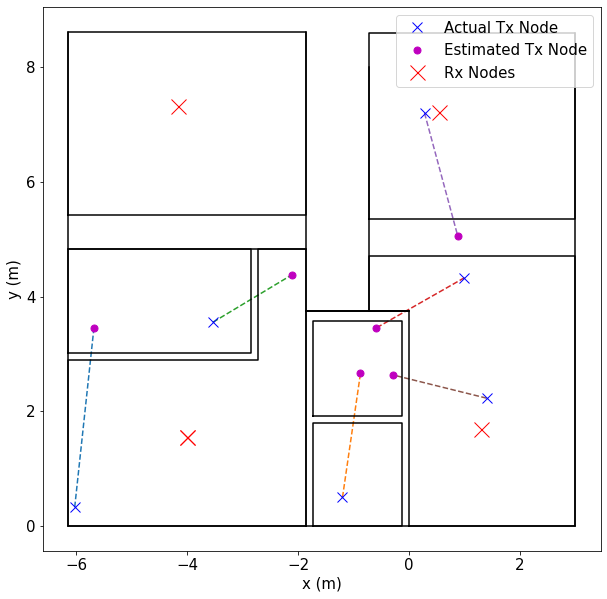

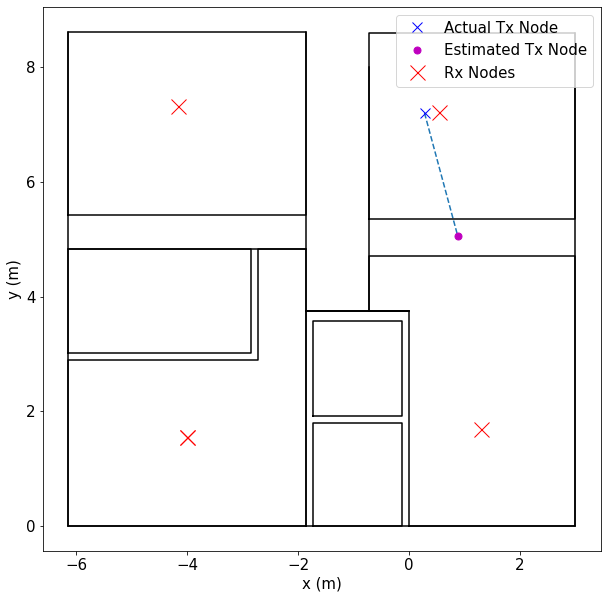

In [ ]:

errorPoints, nonePoints = estimateRoom(points, roomsDicAll)
plotPoints(errorPoints, useRooms=3, roomsDic = roomsDicNew)
plotPoints(nonePoints,useRooms=3, roomsDic= roomsDicNew)

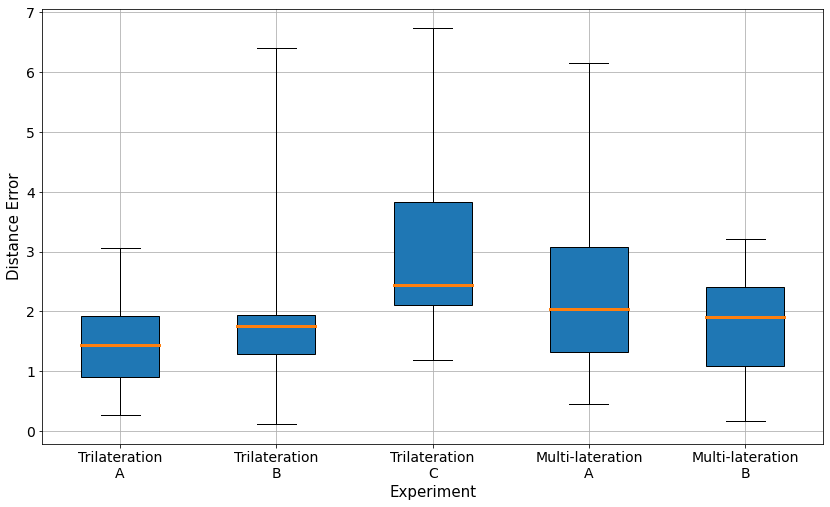

In [ ]:
# Creating the box plot
fig, ax = plt.subplots(figsize = (14,8))
ax.boxplot(boxDic.values(),  vert=True,patch_artist=True,whis=[0, 100],medianprops={'linewidth': 3})

# Setting the x-axis labels to the dictionary's keys (the group names)

box_name = ['Trilateration\nA', 'Trilateration\nB', 'Trilateration\nC', 
            'Multi-lateration\nA', 'Multi-lateration\nB']

# ax.set_xticklabels(boxDic.keys())

ax.set_xticklabels(box_name, )


# Adding a title and labels
# ax.set_title('Comparison of Lateration Experiments',fontsize = '16')


ax.set_xlabel('Experiment', fontsize = '15')
ax.set_ylabel('Distance Error (m)', fontsize = '15')


# Display the plot

plt.xticks(fontsize = '14')
plt.yticks(fontsize = '14')
plt.grid()
plt.show()

In [ ]:
nValues = knownNValues(known_points,rxRssiDic)

(0, 1) [3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 4.02, 4.02, 4.02, 4.29, 4.29, 4.29]
Mean: 3.93 | Median: 3.89 | SD: 0.18
Diff = [0.76, 5.52, 0.0]

(0, 2) [3.37, 3.48, 3.48, 3.48, 3.48, 3.48, 3.48, 3.48, 3.6, 3.6, 3.72, 3.72, 3.95, 3.95, 4.07, 4.07, 4.18, 4.18, 4.3, 4.3]
Mean: 3.77 | Median: 3.66 | SD: 0.31
Diff = [4.54, 5.66, 0.0]

(0, 3) [1.48, 1.48, 1.48, 1.48, 1.48, 1.48, 1.48, 1.48, 1.48, 1.48, 1.63, 1.63, 1.63, 1.63, 1.63, 1.63, 1.63, 1.63, 1.63, 1.63]
Mean: 1.56 | Median: 1.555 | SD: 0.07
Diff = [4.71, 0.09, 0.35]

(1, 2) [2.62, 2.62, 2.62, 2.62, 2.62, 2.62, 2.62, 2.62, 2.62, 2.62, 2.62, 2.76, 2.76, 2.76, 2.76, 2.76, 2.76, 2.9, 2.9, 2.9]
Mean: 2.7 | Median: 2.62 | SD: 0.1
Diff = [5.3, 0.14, 0.0]

(1, 3) [3.35, 3.46, 3.46, 3.46, 3.46, 3.58, 3.58, 3.58, 3.58, 3.58, 3.58, 3.58, 3.58, 3.58, 3.58, 3.58, 3.69, 3.69, 3.69, 3.69]
Mean: 3.57 | Median: 3.58 | SD: 0.09
Diff = [5.47, 5.61, 0.35]

(2, 3) [2.76, 2.76, 2.76, 2.76, 2.76, 2.76, 2.76, 2.

In [ ]:
n = 3.8
def estimateDistance(rssi, n):
    distance = 10 ** ((-20 - rssi) / (10 * n))
    return distance


In [ ]:
def getDistances(data, n = 3.8, nNodes = 4):
    distances = {}
    for key in data.keys():
        distances[key] = [0,0,0,0]
        
        for i in range(nNodes):
            distances[key][i] = round(estimateDistance(data[key][i], n),2)
    return distances

In [ ]:
def getPoints(distances, known_points, cols):
    points = {}
    for key in distances.keys():
        distancesList = []
        for i in range(nNodes):
            if i in cols:
                distancesList.append(distances[key][i])
        
        result = multilaterate(known_points, distancesList)
        points[key] = result

    difference = {}
    diffList = []
    for key in points.keys():
        difference[str(key)] = distance(key[:-1], points[key][:-1])
        diffList.append(difference[str(key)])

    # print(f"Mean Difference: {np.mean(diffList)}")
    # print(f"Mean Difference 2D: {get2DMeanError(points)}")
    # print(f"Mean Difference 3D: {get3DMeanError(points)}")

    return points

In [ ]:
# 0 1 2
# 0 1 3
# 0 2 3
# 1 2 3
# 0 1 2 3

cols = [[0, 0, 0, 1],[1,1,2,2],[2,3,3,3] ]


distances = getDistances(multiData, n = 3.8, nNodes = 4)
distances_10 = {}

count = 0
for key, value in distances.items():
    # if count < 5:
    #     distances_10[key] = value
    #     count += 1
    # else:
    #     break
    distances_10[key] = value

pointsList = []

for i in range(4):
    print([cols[0][i], cols[1][i], cols[2][i]])
    pointsList.append(getPoints(distances_10,[known_points[cols[0][i]], known_points[cols[1][i]], known_points[cols[2][i]]],[cols[0][i], cols[1][i], cols[2][i]]))
    if i ==3:
        print([0,1,2,3])
        pointsList.append(getPoints(distances_10, known_points, [0,1,2,3]))



[0, 1, 2]
[0, 1, 3]
[0, 2, 3]
[1, 2, 3]
[0, 1, 2, 3]


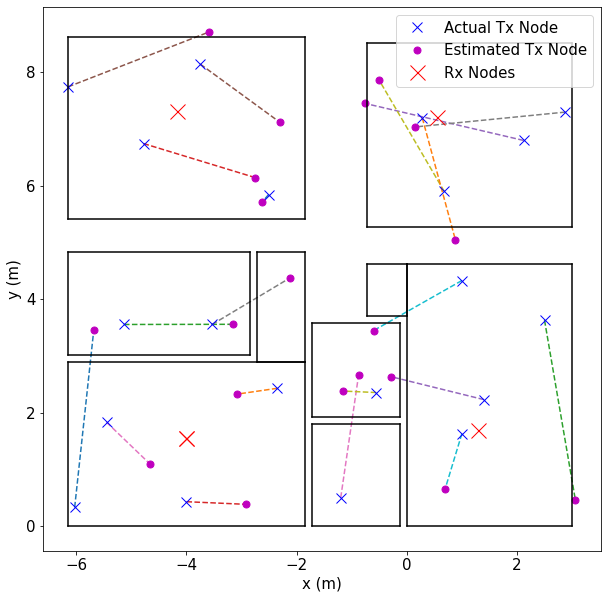

In [ ]:
plotPoints(pointsList[4], useRooms=1, roomsDic=roomsDicAll)

0 1 2
Accuracy:  0.7


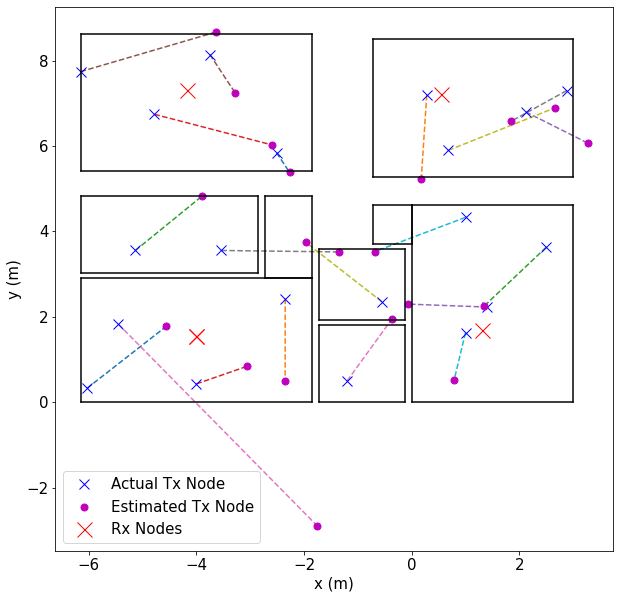

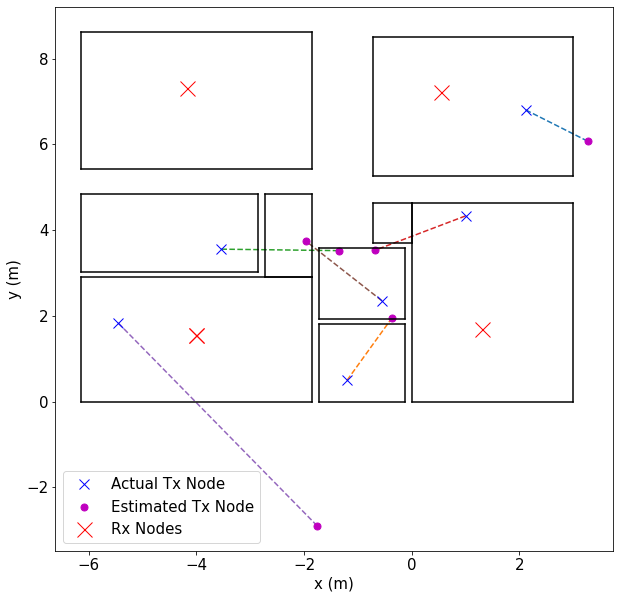

0 1 3
Accuracy:  0.5


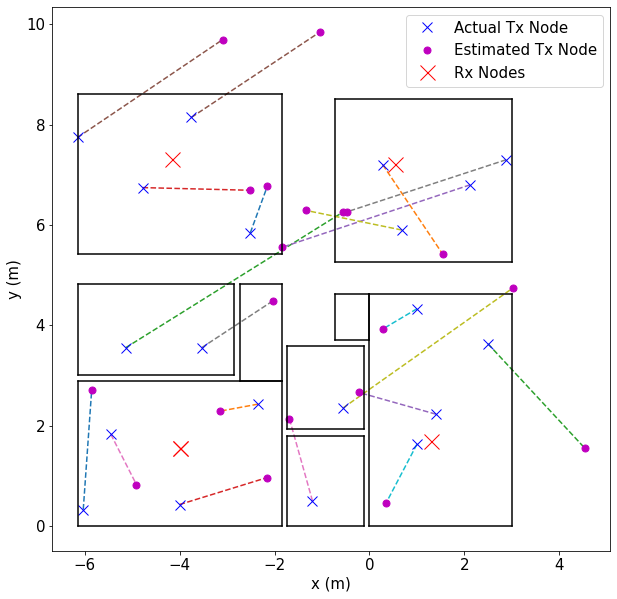

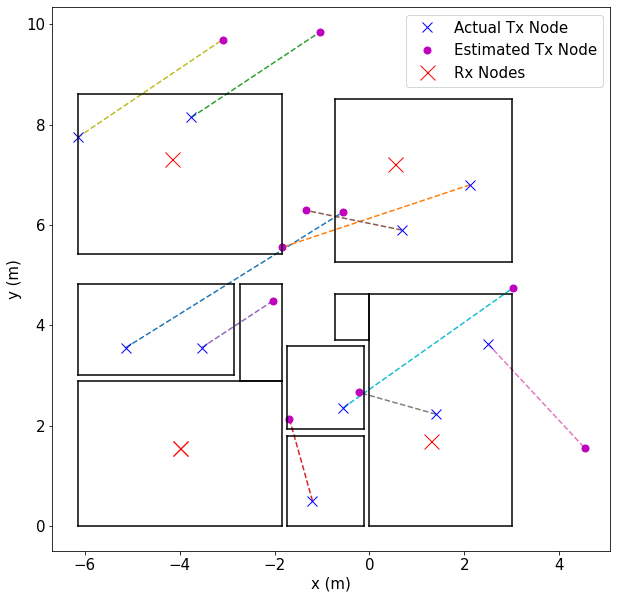

0 2 3
Accuracy:  0.45


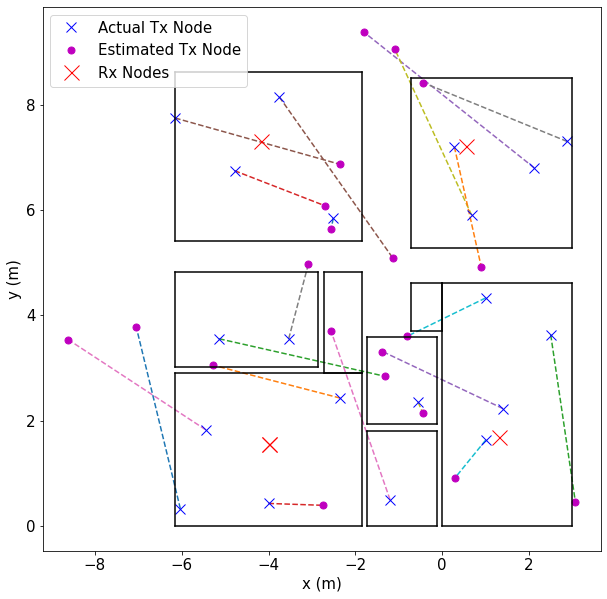

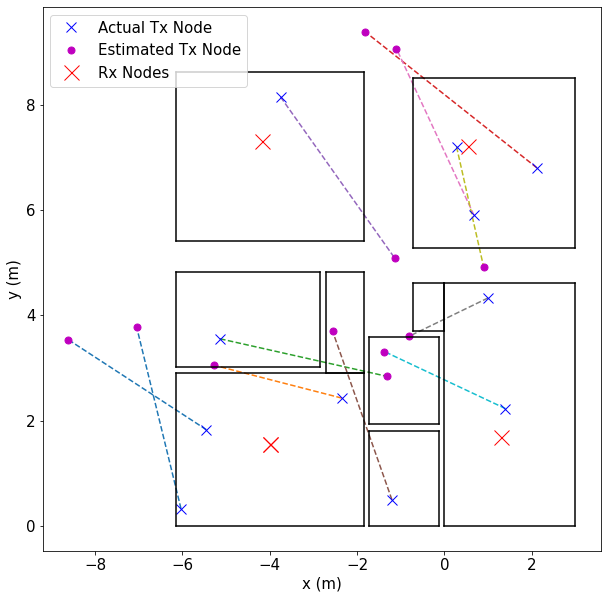

1 2 3
Accuracy:  0.35


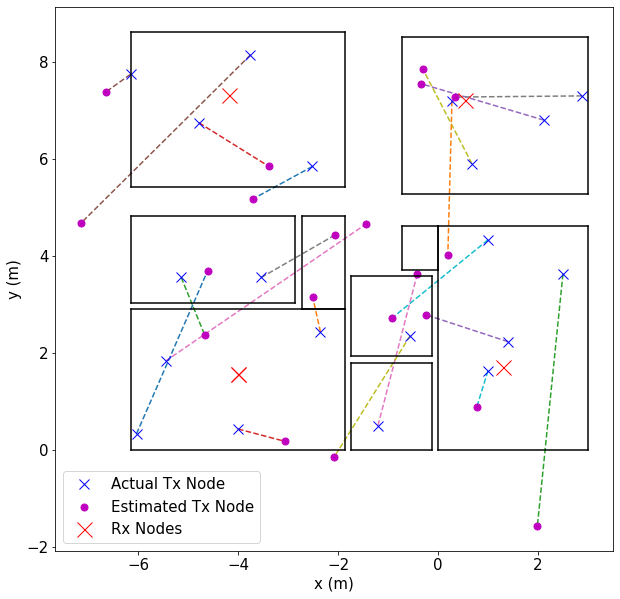

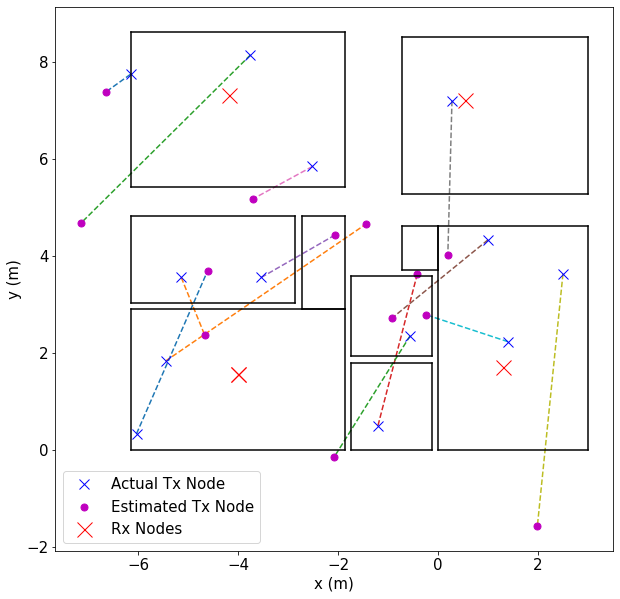

0 1 2 3
Accuracy:  0.7


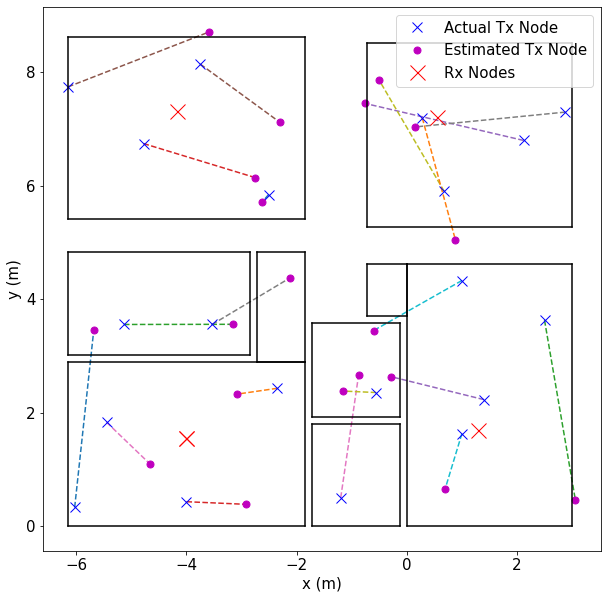

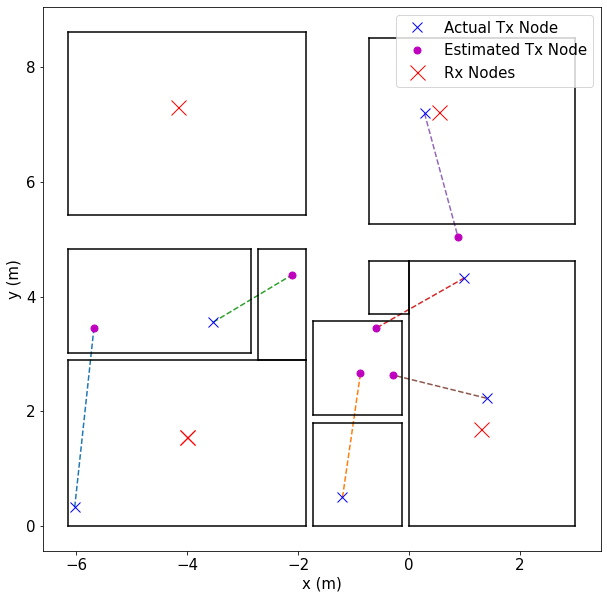

In [ ]:
for i, points in enumerate(pointsList):
    if i<len(pointsList)-1:
        print(cols[0][i],cols[1][i], cols[2][i])
    else:
        print(0,1,2,3)
    errorPoints, nonePoints = estimateRoom(points, roomsDicAll)
    plotPoints(points, useRooms=1, roomsDic = roomsDicAll)

    plotPoints(errorPoints, useRooms=1, roomsDic = roomsDicAll)



In [ ]:
for i,l in enumerate(pointsList):
    print(i)
    print(f"Mean Difference 2D: {get2DMeanError(l)}")

0
Mean Difference 2D: (1.9110206008992883, 0.05, 0.65, 0.25, 0.05, 1.8285500724302328, 1.069795024930565, [0.5175311728007342, 1.0090250478594474, 1.0244128140241524, 1.1323359905779353, 1.2547229696430826, 1.3670868533707559, 1.462547790417506, 1.6668704561411611, 1.784485790510495, 1.7904274015304262, 1.8666727433300396, 1.9276235424101245, 1.974711798240395, 1.9799721630637586, 2.0685156408565417, 2.180346602651317, 2.216913613029213, 2.301710657043773, 2.6891649654219956, 6.005334005062913])
1
Mean Difference 2D: (2.402644295645818, 0.15, 0.3, 0.25, 0.3, 2.1147260483550507, 1.2321948683520298, [0.8067224328319995, 0.8192023175331015, 0.9949039915498076, 1.1384458129127362, 1.3409557114693547, 1.6800336659112916, 1.706452057833821, 1.7688206259536718, 1.9089233379459976, 2.048987221667844, 2.1804648750422575, 2.2557619775169644, 2.3913173350415806, 2.9106532521683874, 3.2000695385812, 3.5012512918702385, 3.628488598677056, 4.147314901223984, 4.3129530037974355, 5.311163963387631])
2

In [ ]:
def plotPointsList(pointsList, both = 0, useRooms = 0, roomsDic = {}, title = ""):
    plt.figure(figsize=(10,10))
    plt.title(title)

    colours = ['r', 'g', 'y', 'k', 'b']
    i = -1
    for points in pointsList:
        i+=1
        for key in points.keys():
            xvals, yvals = [],[]
            xvalsEst, yvalsEst = [], []

            xvals.append(key[0])
            yvals.append(key[1])

            xvals.append(points[key][0])
            yvals.append(points[key][1])

            plt.plot(xvals, yvals, "--")

        xvals, yvals = [],[]
        xvalsEst, yvalsEst = [], []

        for key in points.keys():
            xvals.append(key[0])
            yvals.append(key[1])

            xvalsEst.append(points[key][0])
            yvalsEst.append(points[key][1])

        plt.plot(xvals, yvals, "xb", markersize=10, label = "Actual Tx Node")
        plt.plot(xvalsEst, yvalsEst, f"o{colours[i]}", markersize=7,label = "Estimated Tx Node")
        
    if both == 1:
        plt.axhline(5.27, color='gray', linewidth=0.8) 
        plt.axhline(8.25, color='gray', linewidth=0.8) 
        plt.axhline(0, color='gray', linewidth=0.8) 
        plt.axhline(4.62, color='gray', linewidth=0.8) 
    
        plt.axvline(-0.72, color='gray', linewidth=0.8) 
        plt.axvline(3, color='gray', linewidth=0.8) 


    if useRooms == 1:
        for key in roomsDic.keys():

            plt.plot([roomsDic[key]["xMin"],roomsDic[key]["xMax"]], [roomsDic[key]["yMin"],roomsDic[key]["yMin"]], 'k-')
            plt.plot([roomsDic[key]["xMin"],roomsDic[key]["xMax"]], [roomsDic[key]["yMax"],roomsDic[key]["yMax"]], 'k-')
            
            plt.plot([roomsDic[key]["xMin"],roomsDic[key]["xMin"]], [roomsDic[key]["yMin"],roomsDic[key]["yMax"]], 'k-')
            plt.plot([roomsDic[key]["xMax"],roomsDic[key]["xMax"]], [roomsDic[key]["yMin"],roomsDic[key]["yMax"]], 'k-')

    colours = ['c', 'g', 'm']
    i = 0
    for point in known_points:
        plt.plot(point[0], point[1], f'xr',markersize=10)
        if i == 2:
            plt.plot(point[0], point[1], f'xr',markersize=10, label = "Rx Nodes")
        i+=1
    

    # plt.legend();
    plt.show()


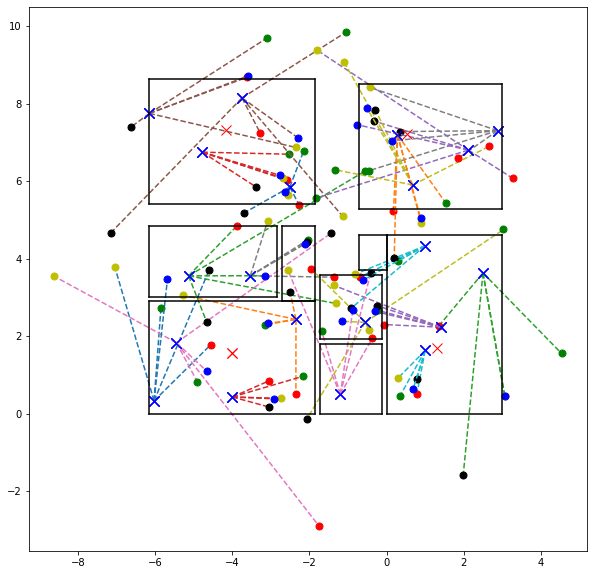

In [ ]:
plotPointsList(pointsList, useRooms=1, roomsDic = roomsDicAll)

{(-2.35, 2.43, 0.9): [7.85, 3.16, 1.44, 3.57]}


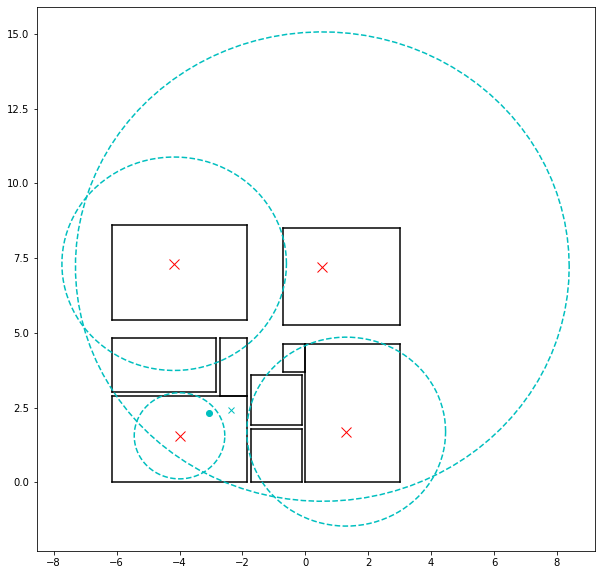

In [ ]:
count = 0
val = 1
d = {}
p = {}
for key, value in distances.items():
    if count == val:
        d[key] = value
        p[key] = pointsList[4][key]
    elif count > val:
        break
    count += 1
    

print(d)

room1 = {'xMin':0, 'xMax': 3, 'yMin':0, 'yMax':4.62}
room2 = {'xMax':-1.6-wallThick*2, 'xMin':-1.6-wallThick*2-4.3 , 'yMin':0, 'yMax':2.9}
room3 = {'xMax':-1.6-wallThick*2, 'xMin': -1.6-wallThick*2-4.3, 'yMin':2.9+1.8+0.59+wallThick, 'yMax':2.9+1.8+0.59+wallThick+3.2}
room0 = {'xMin':-0.72, 'xMax': -0.72+3.72, 'yMin':4.62+0.65, 'yMax':4.62+0.65+3.24}

room2Extra = {'yMin':2.9, 'yMax':2.9+wallThick+1.8,'xMin':-1.6-wallThick*2-0.87,'xMax':-1.6-wallThick*2  }

room1Extra = {'xMin':-0.72, 'xMax':0, 'yMin':1.8+1.65+wallThick*2, 'yMax':4.62}

bathM = {'xMax':-1.6-wallThick*3-0.87, 'xMin': -1.6-wallThick*2-4.3, 'yMin':2.9+wallThick, 'yMax':2.9+wallThick+1.8}
bathL = {'xMax':-wallThick, 'xMin':-wallThick-1.6, 'yMin':1.8+wallThick, 'yMax':1.8+wallThick+1.65}
bathB = {'xMax':-wallThick, 'xMin':-wallThick-1.6, 'yMin':0, 'yMax':1.8}

roomsDic = setRoomsParams({"R1": room1, "R2": room2, "R3":room3, "R0":room0, "BM": bathM, "BL": bathL, "BB": bathB })
roomsDic = roomsDicAll
plt.figure(figsize=(10,10))

for key in roomsDic.keys():

    plt.plot([roomsDic[key]["xMin"],roomsDic[key]["xMax"]], [roomsDic[key]["yMin"],roomsDic[key]["yMin"]], 'k-')
    plt.plot([roomsDic[key]["xMin"],roomsDic[key]["xMax"]], [roomsDic[key]["yMax"],roomsDic[key]["yMax"]], 'k-')
    
    plt.plot([roomsDic[key]["xMin"],roomsDic[key]["xMin"]], [roomsDic[key]["yMin"],roomsDic[key]["yMax"]], 'k-')
    plt.plot([roomsDic[key]["xMax"],roomsDic[key]["xMax"]], [roomsDic[key]["yMin"],roomsDic[key]["yMax"]], 'k-')

for point in known_points:
    plt.plot(point[0], point[1], f'xr',markersize=10)
    if i == 2:
        plt.plot(point[0], point[1], f'xr',markersize=10, label = "Rx Nodes")
    i+=1


radii = {}
for key in d.keys():
    radii[key] = []
    for i in range(len(d[key])):
        radii[key].append(d[key][i])

center = (0, 0)
angles = np.linspace(0, 2*np.pi, 100)
colours = ['c', 'r', 'm', 'y']
j= 0
for key in radii.keys():
# Create an array of angles from 0 to 2*pi
    for i, radius in enumerate(radii[key]):
        # Calculate x and y coordinates of the circle
        x = known_points[i][0] + radius * np.cos(angles)
        y = known_points[i][1] + radius * np.sin(angles)
        # Plot the circle
        plt.plot(x, y, f'--{colours[j%len(colours)]}')
    j+=1
j = 0
for key in d.keys():
    plt.plot(key[0],key[1], f'{colours[j]}x')
    plt.plot(p[key][0], p[key][1], f'{colours[j]}o')
    j+=1
plt.show()

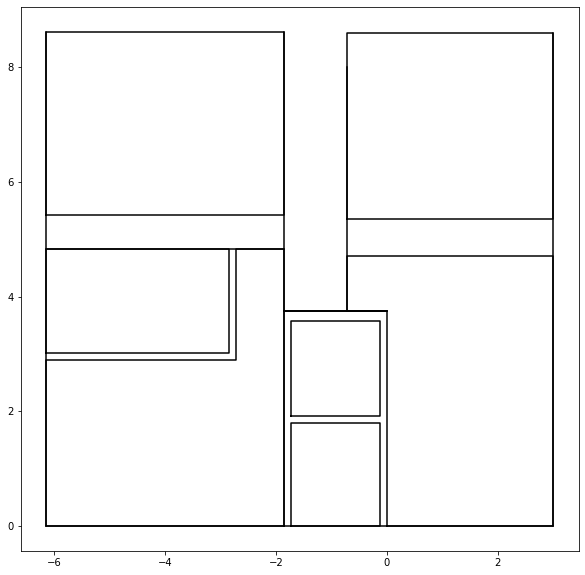

In [ ]:
plt.figure(figsize=(10,10))

wallThick = 0.125

lenroom1 = 4.7
concWallThick = 60


room1 = {'xMin':0, 'xMax': 3, 'yMin':0, 'yMax':4.62}
room1 = [[0,3, 3, -0.72, -0.72, 0,0], [0,0,lenroom1,lenroom1,3+0.63+wallThick,3+0.63+wallThick,0]]


room2 = {'xMax':-1.6-wallThick*2, 'xMin':-1.6-wallThick*2-4.3 , 'yMin':0, 'yMax':2.9}
xList = [-1.6-wallThick*2,-1.6-wallThick*2-4.3,-1.6-wallThick*2-4.3, -1.6-wallThick*2-0.87, -1.6-wallThick*2-0.87 , -1.6-wallThick*2,  -1.6-wallThick*2]
yList = [0,0,2.9,2.9,4.7+wallThick,4.7+wallThick,0]
room2 = [xList,yList]


room3 = {'xMax':-1.6-wallThick*2, 'xMin': -1.6-wallThick*2-4.3, 'yMin':2.9+1.8+0.59+wallThick, 'yMax':2.9+1.8+0.59+wallThick+3.2}

xList = [room3['xMin'], room3['xMax'], room3['xMax'],  room3['xMin'], room3['xMin']]
yList = [room3['yMin'], room3['yMin'], room3['yMax'], room3['yMax'], room3['yMin']]
room3 = [xList, yList]


room0 = {'xMin':-0.72, 'xMax': -0.72+3.72, 'yMin':lenroom1+0.65, 'yMax':lenroom1+0.65+3.24}
xList = [room0['xMin'], room0['xMax'], room0['xMax'],  room0['xMin'], room0['xMin']]
yList = [room0['yMin'], room0['yMin'], room0['yMax'], room0['yMax'], room0['yMin']]
room0 = [xList, yList]


bathM = {'xMax':-1.6-wallThick*3-0.87, 'xMin': -1.6-wallThick*2-4.3, 'yMin':2.9+wallThick, 'yMax':2.9+wallThick+1.8}
xList = [bathM['xMin'], bathM['xMax'], bathM['xMax'],  bathM['xMin'], bathM['xMin']]
yList = [bathM['yMin'], bathM['yMin'], bathM['yMax'], bathM['yMax'], bathM['yMin']]
bathM = [xList, yList]

bathL = {'xMax':-wallThick, 'xMin':-wallThick-1.6, 'yMin':1.8+wallThick, 'yMax':1.8+wallThick+1.65}
xList = [bathL['xMin'], bathL['xMax'], bathL['xMax'],  bathL['xMin'], bathL['xMin']]
yList = [bathL['yMin'], bathL['yMin'], bathL['yMax'], bathL['yMax'], bathL['yMin']]
bathL = [xList, yList]

bathB = {'xMax':-wallThick, 'xMin':-wallThick-1.6, 'yMin':0, 'yMax':1.8}
xList = [bathB['xMin'], bathB['xMax'], bathB['xMax'],  bathB['xMin'], bathB['xMin']]
yList = [bathB['yMin'], bathB['yMin'],bathB['yMax'], bathB['yMax'], bathB['yMin']]
bathB = [xList, yList]

def setRoomsParams(roomsDic): 

    for room in roomsDic.keys():
        for key in roomsDic[room].keys():
            roomsDic[room][key] = round(roomsDic[room][key],2)
    return roomsDic

# roomsDic1 = setRoomsParams({"R1": room1})
# roomsDic1 = {"R1":room1, "R2":room2, "R3":room3, "R0":room0}
# roomsDic2 = setRoomsParams({"R1": room1,"R0":room0})
roomsDic = {"R1": room1, "R2": room2, "R3":room3, "R0":room0, "BM": bathM, "BL": bathL, "BB": bathB }


# roomsDic = {"R1": room1,"R0":room0}
for key in roomsDic.keys():
    plt.plot(roomsDic[key][0],roomsDic[key][1], '-k' )

plt.plot([room2[0][0], room2[0][0]], [room2[1][0], room3[1][-2]], 'k')
plt.plot([room2[0][1], room2[0][1]], [room2[1][0], room3[1][-2]], 'k')

plt.plot([room1[0][1], room1[0][1]], [0, room0[1][-2]], 'k')
plt.plot([room1[0][1], room2[0][1]], [0,0], 'k')
plt.plot([0, room2[0][0]], [3+0.63+wallThick,3+0.63+wallThick], 'k')
plt.plot([0, room2[0][0]], [3+0.63+wallThick,3+0.63+wallThick], 'k')
plt.plot([0, room2[0][0]], [3+0.63+wallThick,3+0.63+wallThick], 'k')
plt.plot([room2[0][1], room2[0][0]], [bathM[1][2], bathM[1][2]], 'k')

plt.plot([room1[0][-3], room1[0][-3]], [3+0.63+wallThick,8], 'k')

plt.show()


def plotFirst2(roomsDic):
    for key in roomsDic.keys():
        plt.plot(roomsDic[key][0],roomsDic[key][1], '-k' )
    plt.plot([roomsDic["R1"][0][1], roomsDic["R1"][0][1]], [0, roomsDic["R0"][1][-2]], 'k')



In [32]:
def getMultiData21(folder_path):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv') and 'Data' in f ]

    # Loop through the CSV files
    
    outputData = {}
    rssiVals = {}

    dic = {}
    rxRssiDic = {}
    
    # RxNID, TXNID, PacketNo, RSSI
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        with open(file_path, newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader, None)

            splitLine = file_path.split("_")

            key = splitLine[-1][:-4]



            
            dic[key] = [[],[],[],[]]
            rx = [[],[],[],[]] 
            rxRssiDic[key] = {}
            noRx = 4
            for i in range(noRx):
                rxRssiDic[key][i] = []
                for j in range(noRx):
                    rxRssiDic[key][i].append(j)
            l= 0
            print(key)
            print("RID, TID, TxPN, TxRSSI,[Rx Nodes RSSI]")
            print('-'*20)
            for row in reader:
                if l <30 and key == 'BathM': 
                    print(row)
                    l+=1
        
                if len(row) == 5:
                    rx[int(row[0])].append(int(row[3]))
                    rxRssiDic[key][int(row[0])]  = []
                    r4 = row[4].strip("[").strip("]").split(", ")

                    for r in r4:
                        if r[1:-1] != '':

                            rxRssiDic[key][int(row[0])].append(int(r[1:-1]))
                        else:
                            rxRssiDic[key][int(row[0])].append(int(r))
            
            i = 0
            
            for l in rx:

                dic[key][i] = rx[i]
                dic[key][i] = np.array(dic[key][i])
                i+=1


   

    return dic, rxRssiDic
dic, rxRssi = getMultiData21('ExperimentData21/')


BathL
RID, TID, TxPN, TxRSSI,[Rx Nodes RSSI]
--------------------
BathM
RID, TID, TxPN, TxRSSI,[Rx Nodes RSSI]
--------------------
['3', '1', '28', '-39', "['-42', '-62', '-36', '0']"]
['3', '1', '29', '-39', "['-42', '-62', '-36', '0']"]
['3', '1', '30', '-39', "['-42', '-62', '-36', '0']"]
['3', '1', '31', '-39', "['-42', '-62', '-36', '0']"]
['3', '1', '27', '-39', "['-42', '-62', '-36', '0']"]
['0', '1', '29', '-45', "[0, 1, 2, '-42']"]
['0', '1', '30', '-45', "[0, 1, 2, '-42']"]
['0', '1', '31', '-45', "[0, 1, 2, '-42']"]
['0', '1', '27', '-45', "[0, 1, 2, '-42']"]
['0', '1', '28', '-45', "[0, 1, 2, '-42']"]
['1', '1', '33', '-41', "['-40', '120', '-33', '-61']"]
['1', '1', '34', '-41', "['-40', '120', '-33', '-61']"]
['1', '1', '35', '-41', "['-40', '120', '-33', '-61']"]
['1', '1', '36', '-41', "['-40', '120', '-33', '-61']"]
['1', '1', '32', '-41', "['-40', '120', '-33', '-61']"]
['2', '1', '33', '-33', "['-53', '-33', '0', '-36']"]
['2', '1', '34', '-33', "['-53', '-33', '0',

## Machine Learning

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix


In [34]:
ml_dic = {}


ignoreList = ['Hall', 'BathM', 'BathB', 'BathL']
# ignoreList = ['Hall',]
XList = []
yList = []


for key in dic.keys():
       if key in ignoreList:
              continue
       for i in range(len(dic[key][0])-5):
       
              XList.append([dic[key][0][i], dic[key][1][i], dic[key][2][i], dic[key][3][i]])
              yList.append(key)


X = np.array(XList)  # Features (RSSI values)
y = np.array(yList)  # Target variable (room labels)

# Split the data into training and testing sets


In [35]:
def getStuff(avNo, ignoreList = ['Hall']):
        ml_dic = {}


        # ignoreList = ['Hall', 'BathM', 'BathB', 'BathL']
        # ignoreList = ['Hall']

        XList = []
        yList = []



        for key in dic.keys():
                if key in ignoreList:
                        continue
                for i in range(min([len(dic[key][0]), len(dic[key][1]), len(dic[key][2]), len(dic[key][3])] )//avNo):
                        addList = [] 
                        for j in range(avNo):
                                for k in range(4):
                                        addList.append(dic[key][k][avNo*i+j])
                        XList.append(addList)
                        yList.append(key)

        X = np.array(XList)  # Features (RSSI values)
        y = np.array(yList)  # Target variable (room labels)
        return X, y
# Split the data into training and testing sets


In [36]:
accuracyListAll = []
accuracyListBedOnly = []

avNoList = [1,5,10,15, 20, 25,30,35,40]
confMatrices  = {}
confMatricesBed  = {}

for avNo in avNoList:
    print(avNo)
    X,y = getStuff(avNo)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

    # Initialize logistic regression model
    print("Training")

    model = LogisticRegression(random_state=10, max_iter = 10000, multi_class= 'multinomial', C = 0.3).fit(X_train, y_train)
    # Train the model

    labels = model.classes_

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracyListAll.append(accuracy*100)
    print("Accuracy:", accuracy)
    print("y_test len: ", len(y_test))
    conf_matrix = confusion_matrix(y_test, y_pred)
    confMatrices[avNo] = conf_matrix

    X,y = getStuff(avNo, ignoreList = ['Hall', 'BathM', 'BathB', 'BathL'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

    # Initialize logistic regression model
    print("Training")

    model = LogisticRegression(random_state=10, max_iter = 10000, multi_class= 'multinomial', C = 0.3).fit(X_train, y_train);
    # Train the model
    

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracyListBedOnly.append(accuracy*100)
    print("Accuracy:", accuracy)
    print("y_test len: ", len(y_test))

    conf_matrix = confusion_matrix(y_test, y_pred)
    confMatricesBed[avNo] = conf_matrix




1
Training
Accuracy: 0.8305613305613305
y_test len:  962
Training
Accuracy: 0.9640522875816994
y_test len:  612
5
Training


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8341968911917098
y_test len:  193
Training


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.967479674796748
y_test len:  123
10
Training


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.84375
y_test len:  96
Training
Accuracy: 1.0
y_test len:  61
15
Training
Accuracy: 0.828125
y_test len:  64
Training
Accuracy: 1.0
y_test len:  41
20
Training


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8541666666666666
y_test len:  48
Training
Accuracy: 1.0
y_test len:  31
25
Training
Accuracy: 0.9736842105263158
y_test len:  38
Training
Accuracy: 1.0
y_test len:  25
30
Training
Accuracy: 1.0
y_test len:  32
Training
Accuracy: 1.0
y_test len:  20
35
Training


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8518518518518519
y_test len:  27
Training
Accuracy: 1.0
y_test len:  18
40
Training
Accuracy: 0.8333333333333334
y_test len:  24
Training
Accuracy: 1.0
y_test len:  15


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


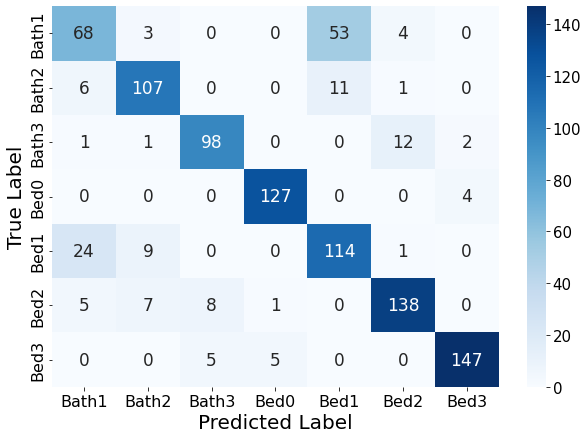

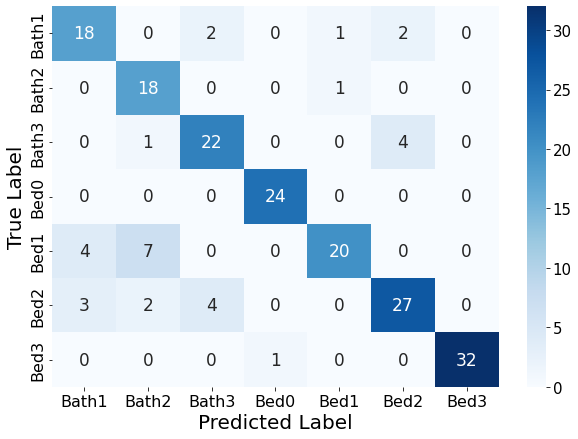

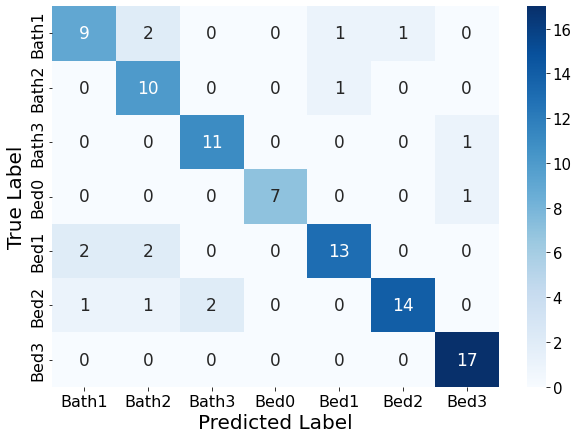

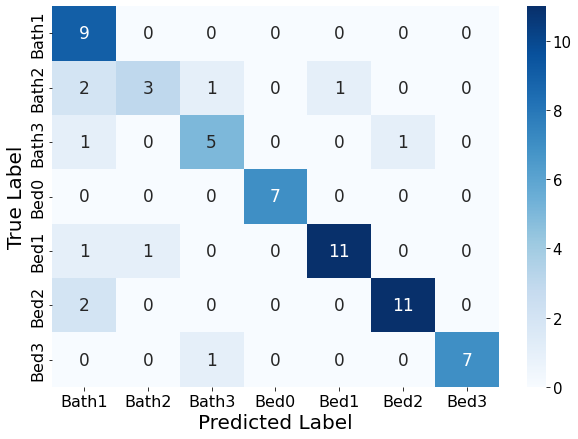

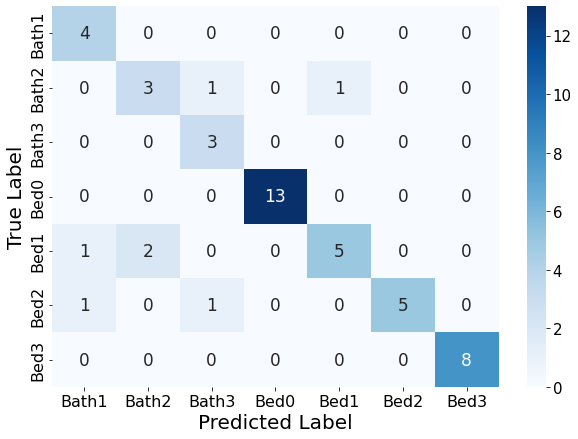

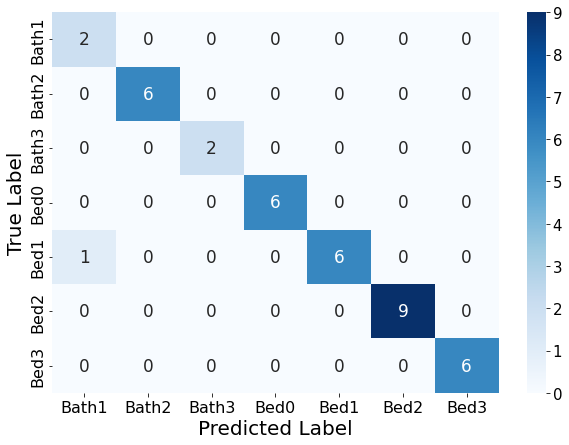

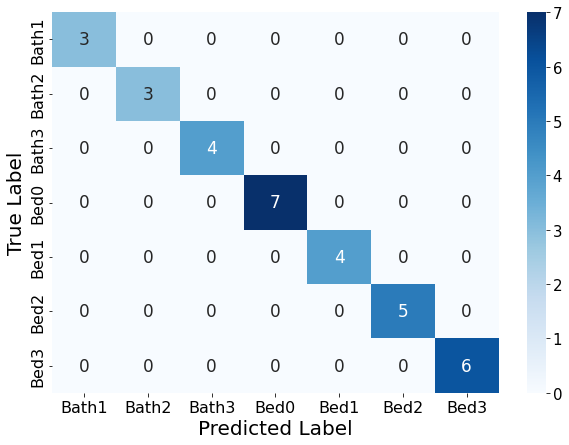

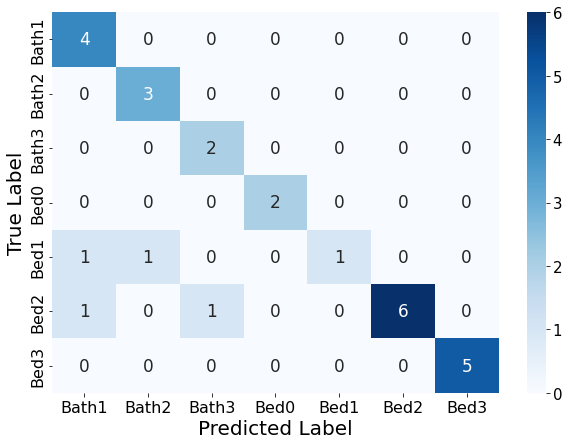

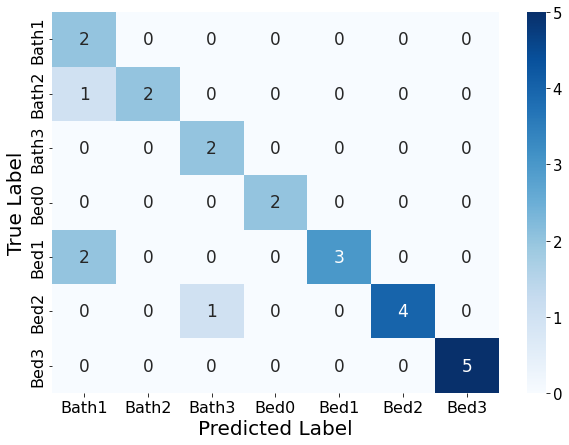

In [74]:
import seaborn as sns
# Use model classes as labels for the confusion matrix

labels = ['Bath1', 'Bath2', 'Bath3', 'Bed0', 'Bed1', 'Bed2','Bed3']
fontsize = 20
for key in confMatrices.keys():
    conf_matrix = confMatrices[key]
    plt.figure(figsize=(10, 7))
    ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, annot_kws={"size": fontsize - 3})
    plt.xlabel("Predicted Label", fontsize = fontsize)
    plt.ylabel("True Label", fontsize = fontsize)

    plt.xticks(fontsize = fontsize-4)
    plt.yticks(fontsize = fontsize-4)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=15)
    plt.show()

# labels = ['Bed0', 'Bed1', 'Bed2','Bed3']
# fontsize = 17
# for key in confMatricesBed.keys():
#     conf_matrix = confMatricesBed[key]
#     plt.figure(figsize=(10, 7))
#     sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greys", xticklabels=labels, yticklabels=labels)
#     # if key > 1:

#     #     plt.title(f"Confusion Matrix: {key} Input Features", fontsize = fontsize)
#     # else:
#     #     plt.title(f"Confusion Matrix: {key} Input Feature", fontsize =fontsize)
#     plt.xlabel("Predicted Label", fontsize = fontsize-3)
#     plt.ylabel("True Label", fontsize = fontsize-3)

#     plt.xticks(fontsize = fontsize-5)
#     plt.yticks(fontsize = fontsize -5)
#     plt.show()

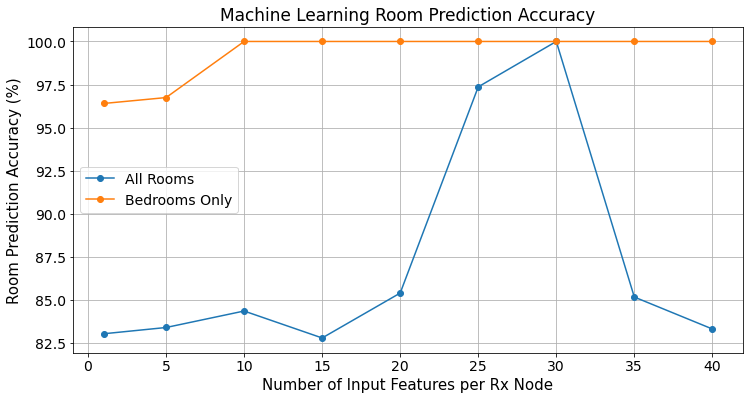

In [38]:
plt.figure(figsize = (12,6))
plt.plot(avNoList, accuracyListAll, 'o-', label = 'All Rooms')
plt.plot(avNoList, accuracyListBedOnly, 'o-', label = 'Bedrooms Only')


plt.grid()
plt.xlabel("Number of Input Features per Rx Node", fontsize = 15)
plt.ylabel("Room Prediction Accuracy (%)", fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Machine Learning Room Prediction Accuracy", fontsize = 17 )
plt.legend(fontsize = 14)
plt.show()

In [39]:
print(len(y_test))
for i in range(len(y_test)):

    if y_test[i]!=y_pred[i]:

        print(y_test[i],y_pred[i])


15


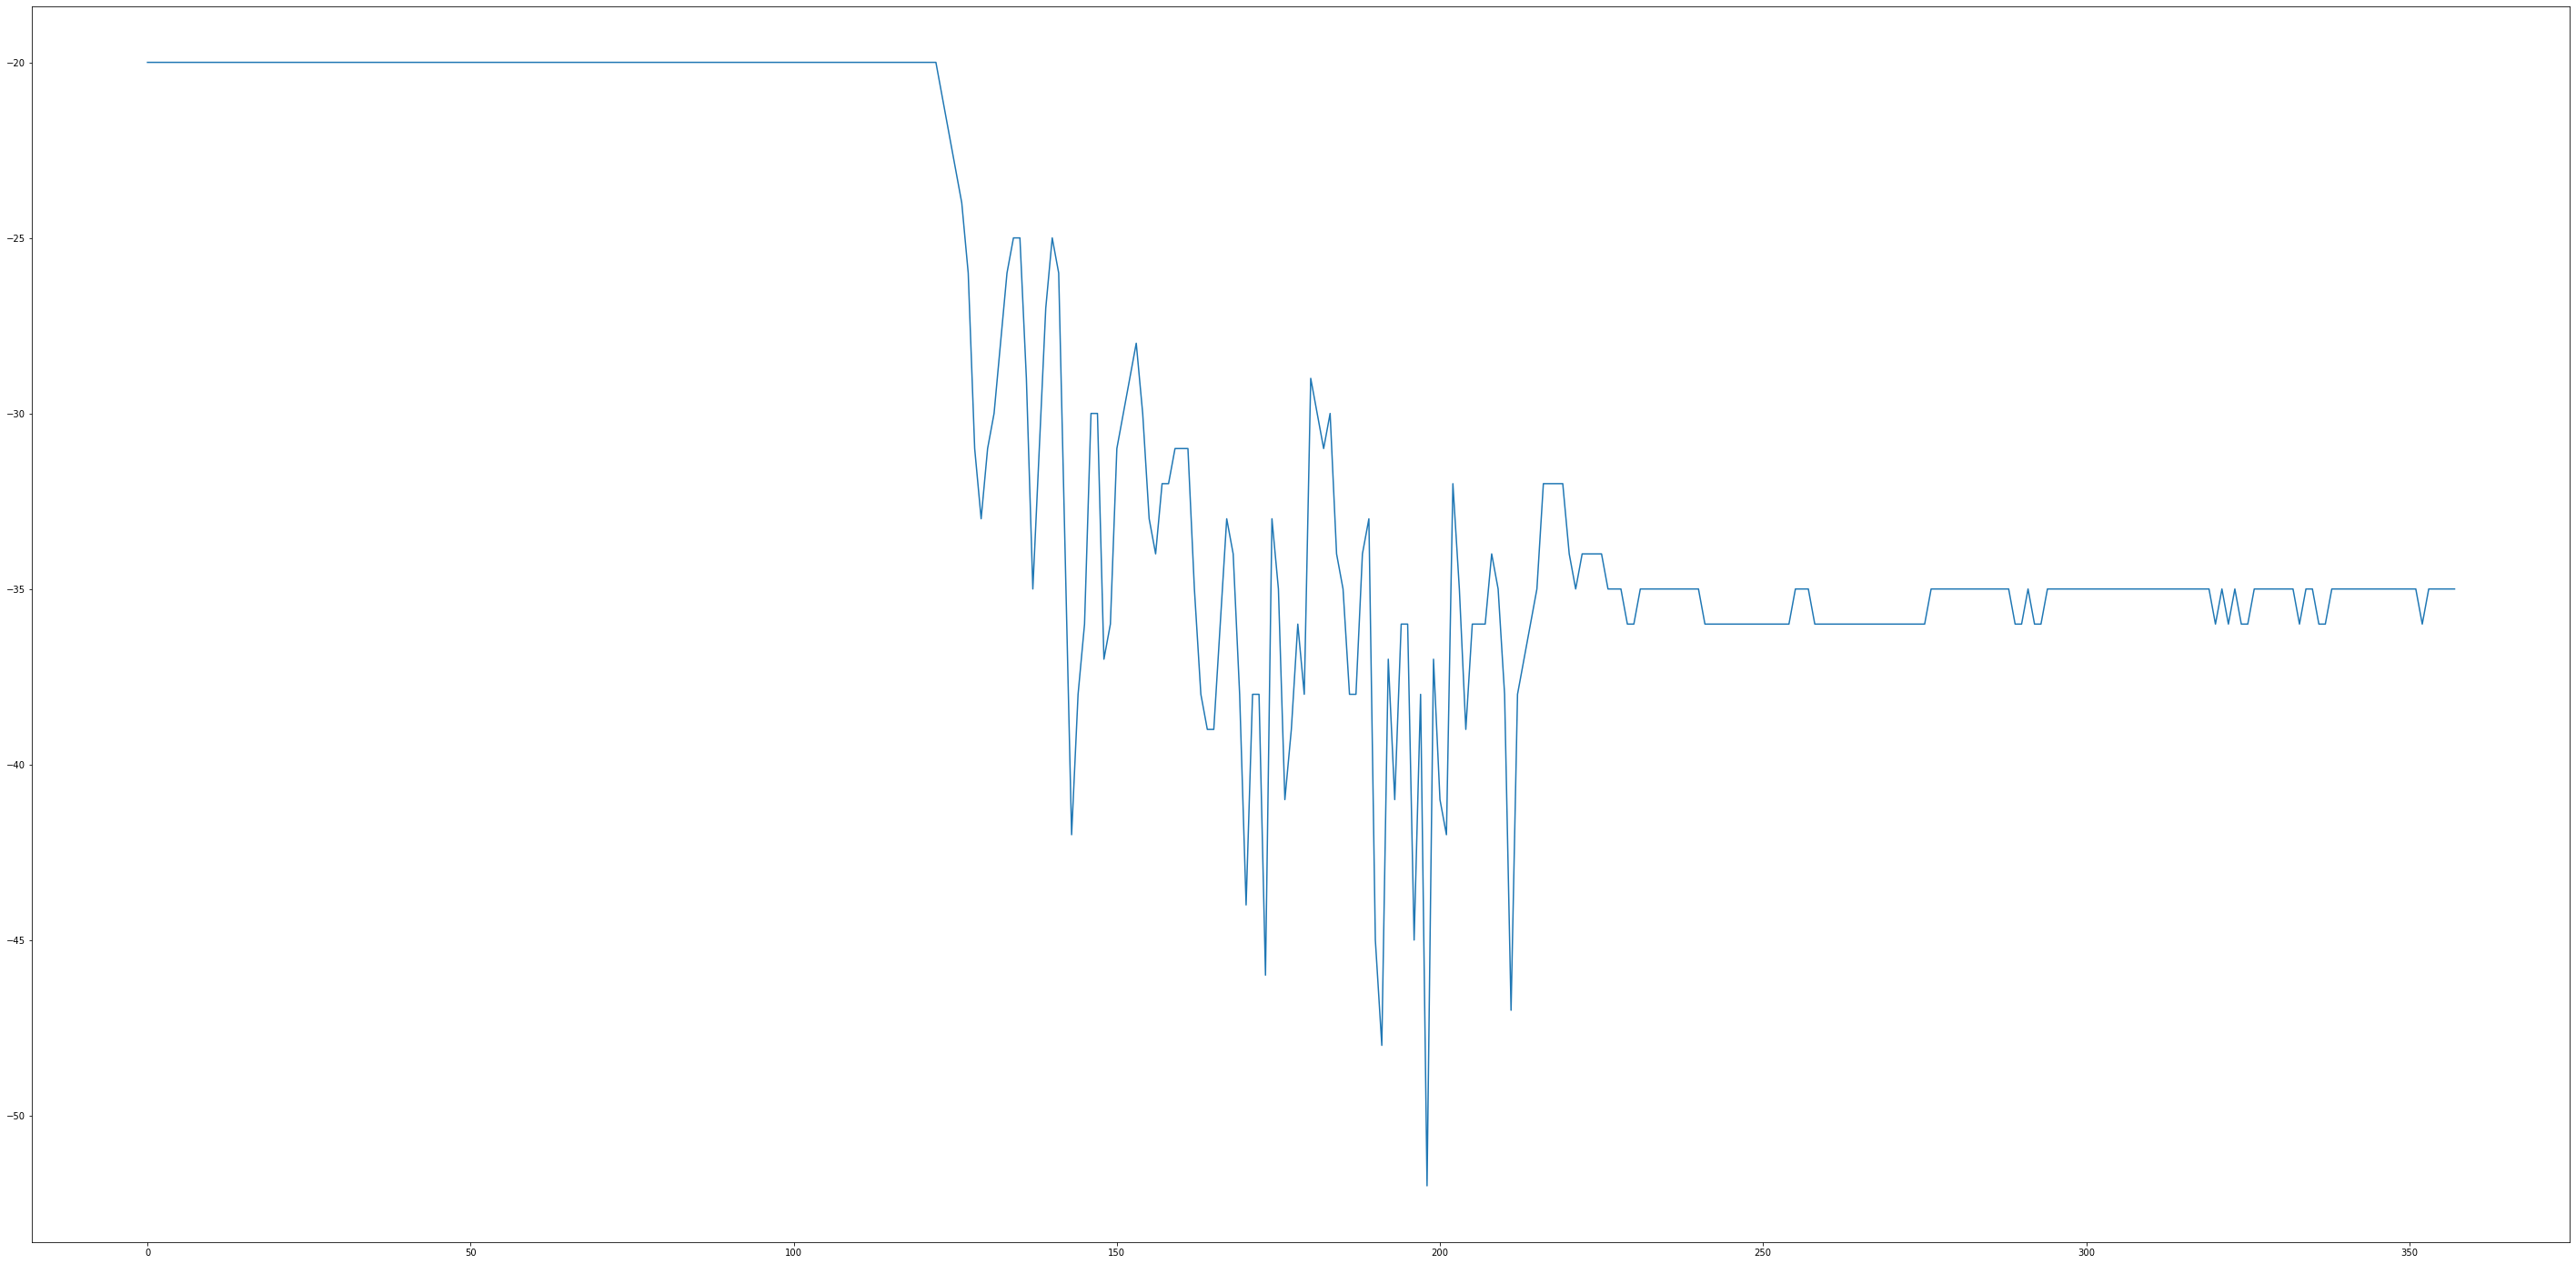

In [40]:
def getDataCar(folder_path):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('9.csv')]

    # Loop through the CSV files
    
    rssiVals = []
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        with open(file_path, newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader, None)
            
            for row in reader:
                if len(row) == 5:
                    node_id, rssi, freq, packet_no, absTime = map(int, row)
                    rssiVals.append(rssi)
    
    
    return rssiVals

folder_path = "ExperimentData22"

rssiVals = getDataCar(folder_path)

plt.figure(figsize=(50, 25))
plt.plot(rssiVals)
plt.show()

In [41]:
def getRollingAv(rssiVals):
    returnDic = {}
    for avNo in [5,8,10,15,20, 50]:

        rollingAv = [-20 for i in range(avNo)]

        pointer = 0
        rollingAvList = []
        for val in rssiVals:
            
            rollingAv[pointer] = val
            rollingAvList.append(np.mean(rollingAv))
            pointer +=1

            if pointer == avNo:
                pointer = 0

        returnDic[avNo] = rollingAvList
    return returnDic


rollingAvDic = getRollingAv(rssiVals[:-500])

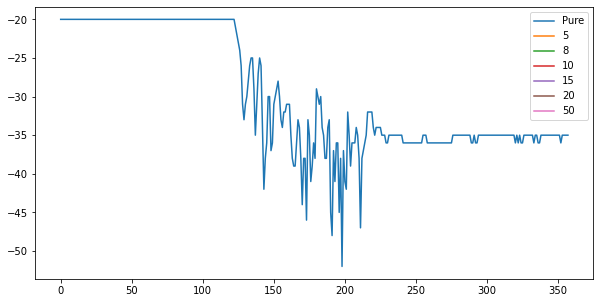

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(rssiVals, label = 'Pure')


for key in rollingAvDic.keys():
    plt.plot(rollingAvDic[key], label = key)

plt.legend()
plt.show()

In [43]:

def getDownstairsData():
    folder_path = "/Users/benmcpartlin/Desktop/Uni/Year4/Project/Code/HProject/ExperimentData20"
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]


    filesRssi = {}
    filesRxDic = {}

    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        rssiVals = [[],[],[],[]]
        rxRssiDic = {}
        with open(file_path, newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader, None)

            splitLine = file_path.split("_")

            key = splitLine[-1]
            # dic[key] = [[],[],[],[]]

            rx = [[],[],[],[]] 
            rxRssiDic[key] = {}
            noRx = 4
            for i in range(noRx):
                rxRssiDic[key][i] = []
                for j in range(noRx):
                    rxRssiDic[key][i].append(j)

            j = 0
        

            avNo = 20
            rollingAv = []
            for i in range(noRx):
                averages = [0 for i in range(avNo)]
                rollingAv.append(averages)

            for row in reader:

                if len(row) == 5:

                    rxNID = int(row[0])

                    rx[rxNID].append(int(row[3]))
                    rssiVals[rxNID].append(int(row[3]))
                    rxRssiDic[key][rxNID]  = []
                    r4 = row[4].strip("[").strip("]").split(", ")

                
                    for i, r in enumerate(r4):
                        if r[1:-1] != '':
                            rx[rxNID].append(int(r[1:-1]))
                        else:
                            rx[rxNID].append(int(r))

        filesRssi[key] = rssiVals
        filesRxDic[key] = rx
    return filesRssi,filesRxDic
                


filesRssi,filesRxDic = getDownstairsData()
        

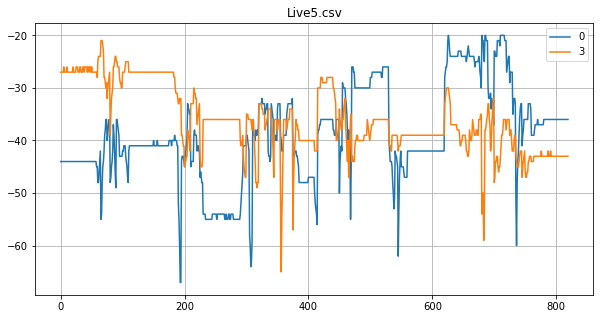

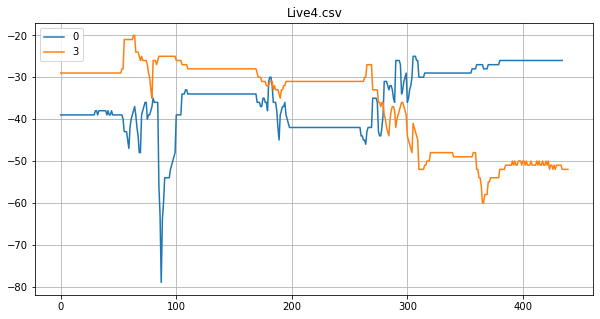

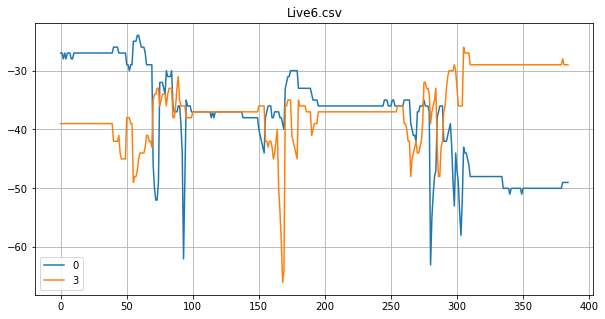

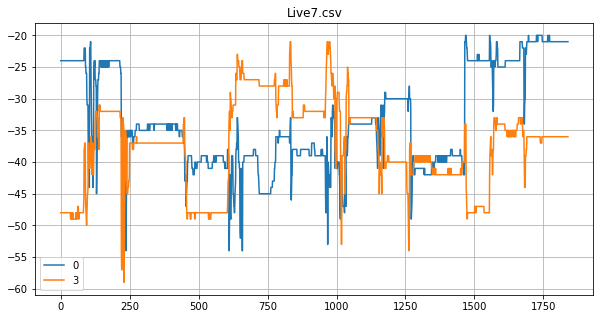

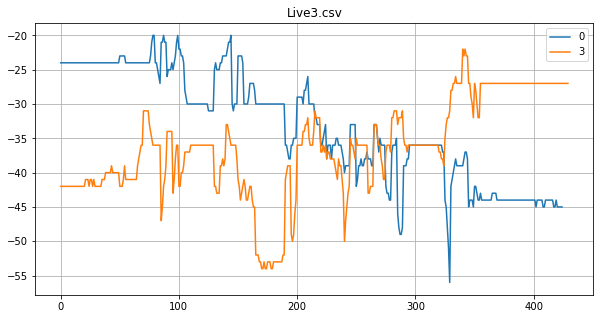

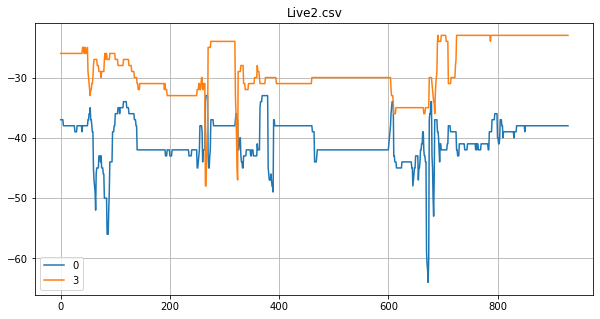

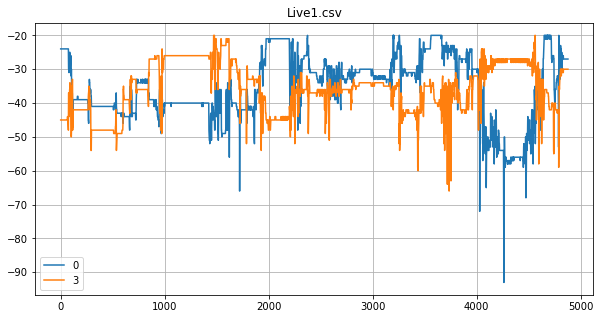

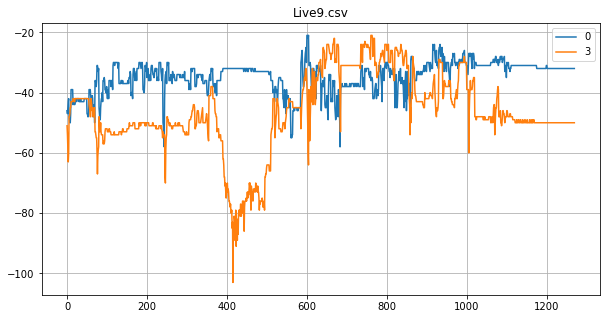

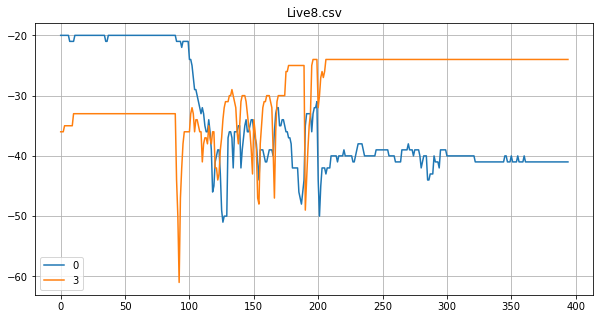

In [44]:
for key in filesRssi.keys():
    plt.figure(figsize=(10, 5))
    plt.title(key)
    for i, l in enumerate(filesRssi[key]):
        if i ==0 or i ==3:
            plt.plot(l, label = i)
    plt.legend()
    plt.grid()
    plt.show()


In [45]:
def estimateDistance(rssi, n):
    distance = 10 ** ((-20 - rssi) / (10 * n))
    return distance

In [46]:
def getDistance(D, p,N):
    return (D/N)*p

In [47]:
def getPoint(distance):
    return [1, distance, 0.15]

rx0P = (0, 0.35, 0.9)

rx1P = (0, 3.03, 0.8)

rx2P = (0, 4.32, 0.8)

rx3P = (0, 7.35, 0.95)

rxNodes = [rx0P, rx1P, rx2P, rx3P]

In [48]:
def distance2(p1, p2):
    """Calculate the Euclidean distance between two 3D points."""
    answer = np.linalg.norm(np.array(p1) - np.array(p2))
    if p2[1] > p1[1]:
        return -answer
    return answer


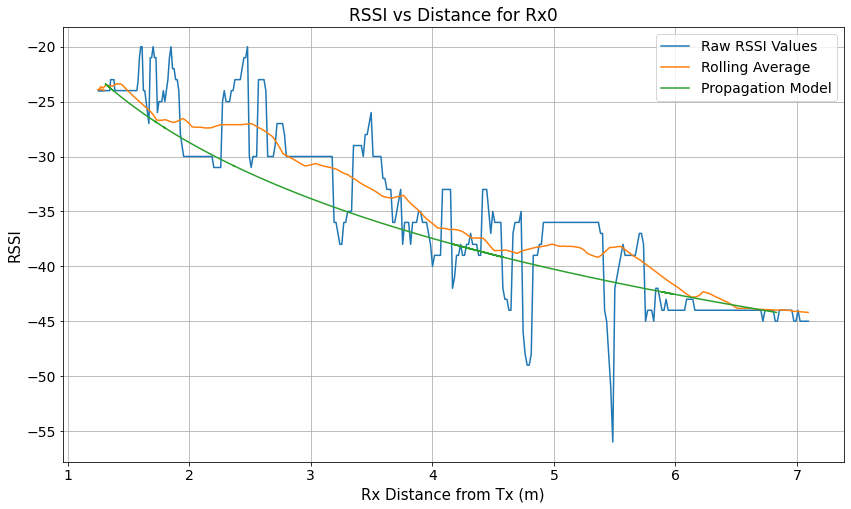

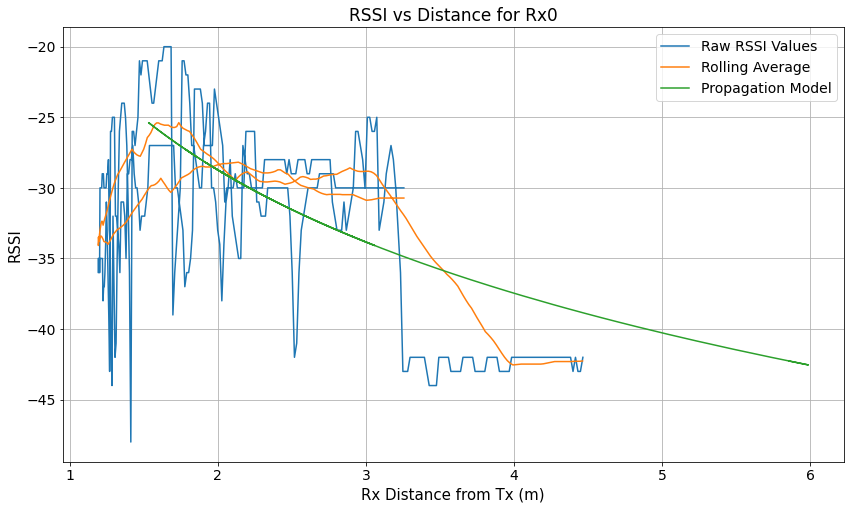

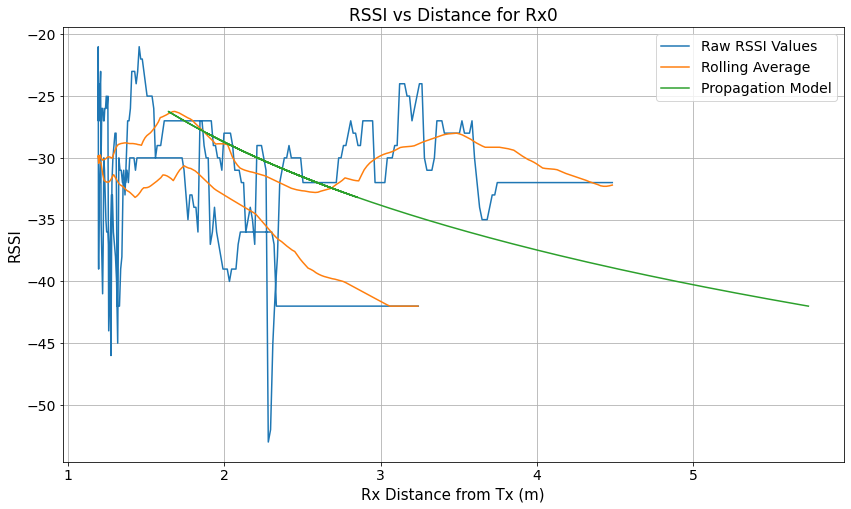

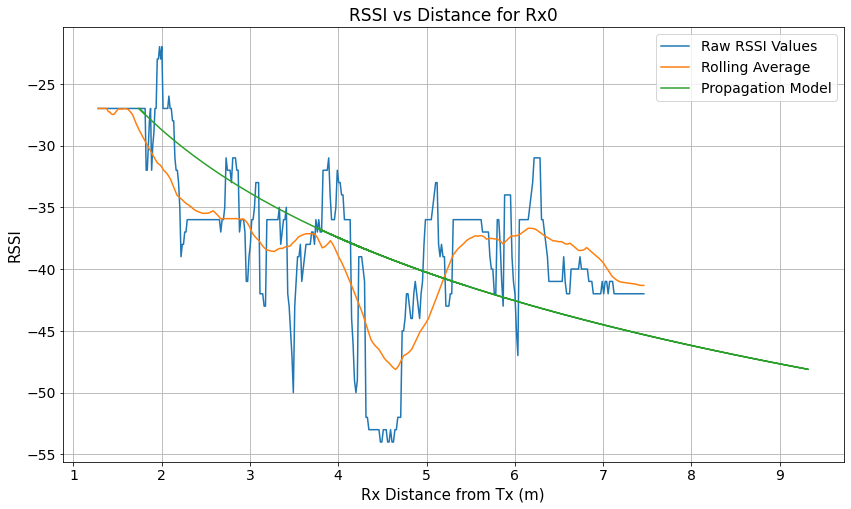

In [49]:
data3 = filesRssi['Live3.csv']

avList = []
for l in data3:
    avList.append(getRollingAv(l))

for i, l in enumerate(data3):
    distances = []
    distancesNorm = []
    for j in range(len(avList[i][50][50:])):
        d = getDistance(7.35, j,len(avList[i][50][50:]))
        distances.append(distance(getPoint(d), rxNodes[i]))
    
    for j in range(len(l)):
        d = getDistance(7.35, j,len(l))
        distancesNorm.append(distance(getPoint(d), rxNodes[i]))

    # if i ==0 or i ==3:
    
    plt.figure(figsize=(14, 8))

    plt.plot(distancesNorm, l, label = f'Raw RSSI Values')
    plt.plot(distances, avList[i][50][50:], label ='Rolling Average')
    plt.plot(estimateDistance(np.array(avList[i][50][50:]), 2.9),avList[i][50][50:], label = f'Propagation Model')

    plt.title("RSSI vs Distance for Rx0", fontsize = '17')
    plt.xlabel("Rx Distance from Tx (m)", fontsize = '15')
    plt.ylabel("RSSI", fontsize = '15')

    plt.xticks(fontsize = '14')
    plt.yticks(fontsize = '14')
    plt.grid()
    plt.legend(fontsize = '14')
    plt.show()

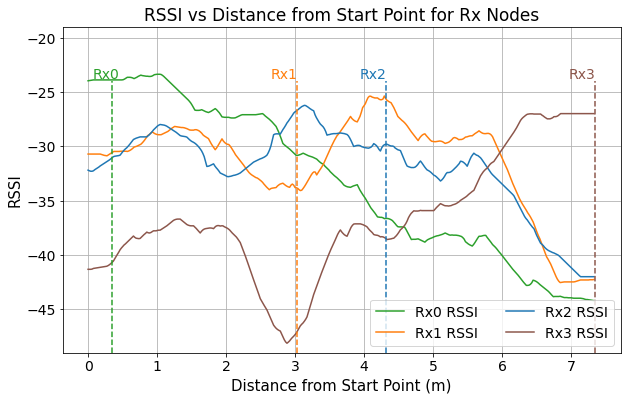

In [50]:
data3 = filesRssi['Live3.csv']
cols = ['tab:green', 'tab:orange', 'tab:blue', 'tab:brown']
plt.figure(figsize=(10, 6))
avList = []
for l in data3:
    avList.append(getRollingAv(l))

for i, l in enumerate(data3):
    distances = []
    for j in range(len(avList[i][50][50:])):
        distances.append(getDistance(7.35, j,(len(avList[i][50][50:]))))
    if i ==0 or i ==1 or i==3 or i ==2:
        # plt.plot(l, label = f'Norm {i}')
        plt.plot(distances, avList[i][50][50:], label =f'Rx{i} RSSI', color = cols[i])
        # plt.plot(estimateDistance(np.array(avList[i][50][50:]), 3.2),avList[i][50][50:], label = f'EST:{i}')

plt.plot([0.35, 0.35], [-49, -24], '--',color = 'tab:green')
plt.plot([3.03, 3.03], [-49, -24], '--', color = 'tab:orange')
plt.plot([4.32, 4.32], [-49, -24], '--', color = 'tab:blue' )
plt.plot([7.35, 7.35], [-49, -24], '--', color = 'tab:brown')

plt.text(0.45, -24, 'Rx0', verticalalignment='bottom', horizontalalignment='right', color = 'tab:green', fontsize = 14)
plt.text(3.03, -24, 'Rx1', verticalalignment='bottom', horizontalalignment='right', color = 'tab:orange', fontsize = 14)
plt.text(4.32, -24, 'Rx2', verticalalignment='bottom', horizontalalignment='right', color = 'tab:blue', fontsize = 14)
plt.text(7.35, -24, 'Rx3', verticalalignment='bottom', horizontalalignment='right', color = 'tab:brown', fontsize = 14)


plt.title("RSSI vs Distance from Start Point for Rx Nodes", fontsize = 17)
plt.xlabel("Distance from Start Point (m)", fontsize = 15)
plt.ylabel("RSSI", fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(-49, -19)
plt.grid()
plt.legend(fontsize = 14, loc = 'lower right', ncol = 2,bbox_to_anchor=(1, 0) )
plt.show()

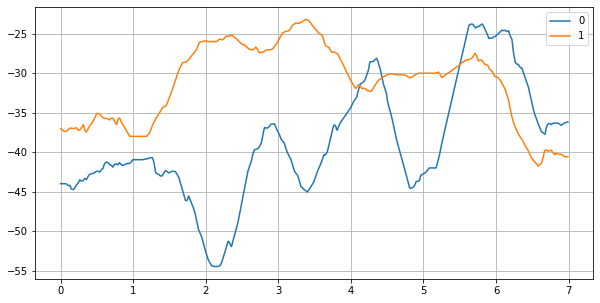

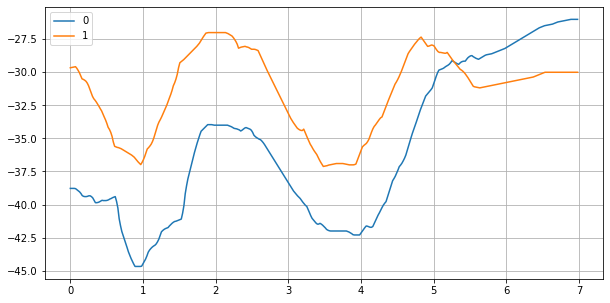

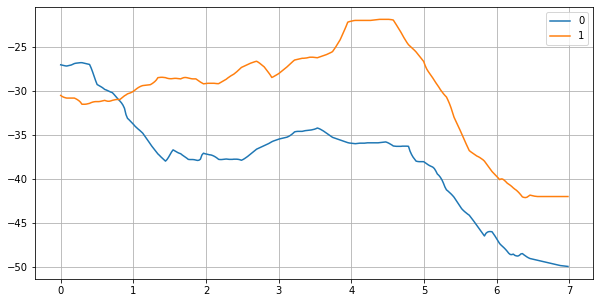

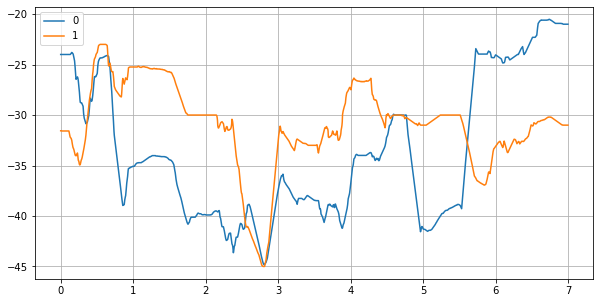

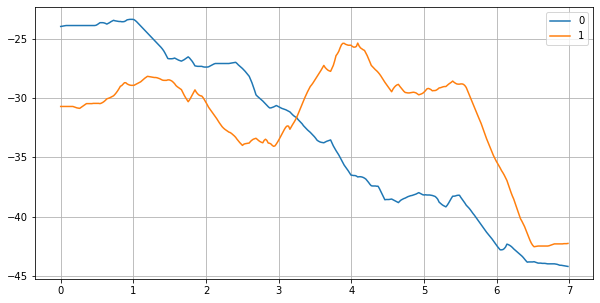

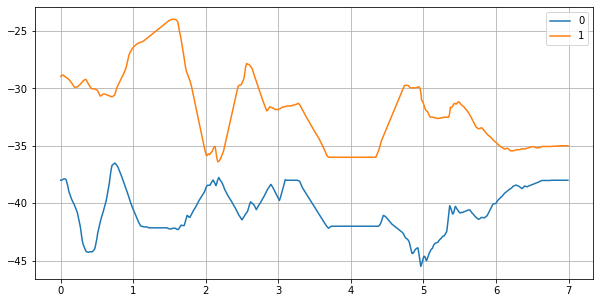

KeyboardInterrupt: 

In [51]:
data3 = filesRssi['Live3.csv']

for data3 in filesRssi.values():
    plt.figure(figsize=(10, 5))
    avList = []
    for l in data3:
        avList.append(getRollingAv(l))

    for i, l in enumerate(data3):
        distances = []
        for j in range(len(avList[i][50][50:])):
            distances.append(getDistance(7, j,(len(avList[i][50][50:]))))
        if i ==0 or i ==1:
            # plt.plot(l, label = f'Norm {i}')
            plt.plot(distances, avList[i][50][50:], label =i)
            # plt.plot(estimateDistance(np.array(avList[i][50][50:]), 3.2),avList[i][50][50:], label = f'EST:{i}')
    plt.grid()
    plt.legend()
    plt.show()

In [ ]:
def getDistance(D, p,N):
    return (D/N)*p

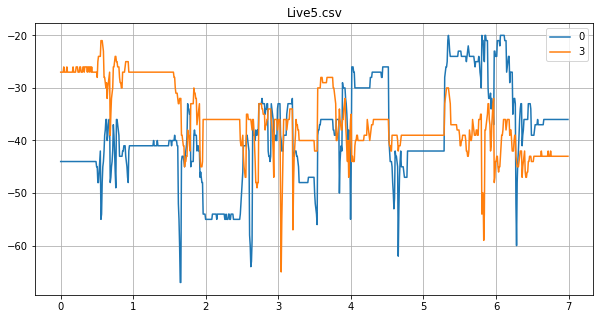

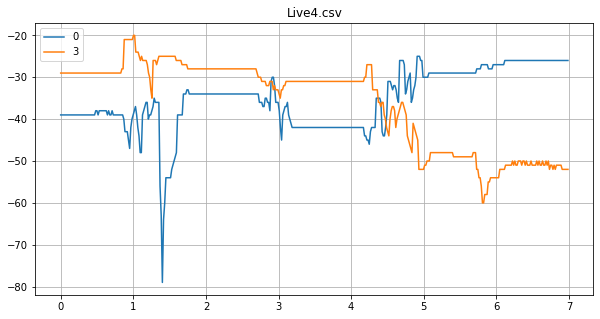

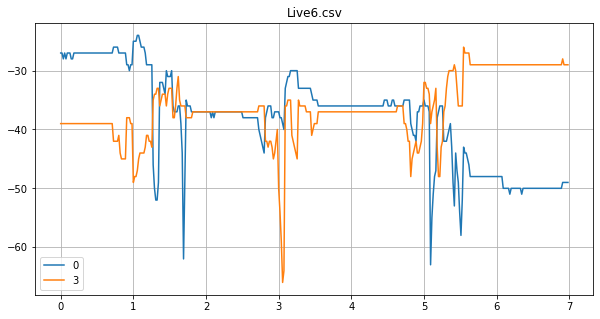

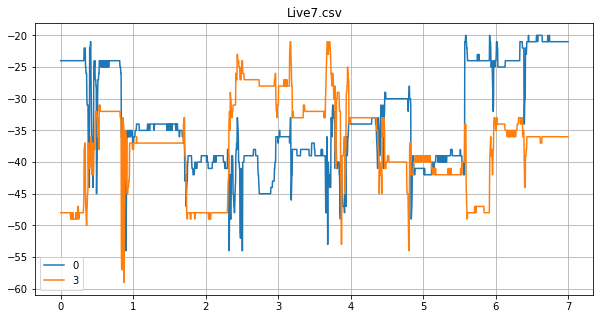

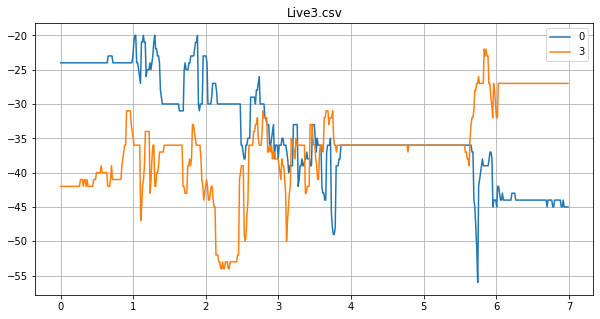

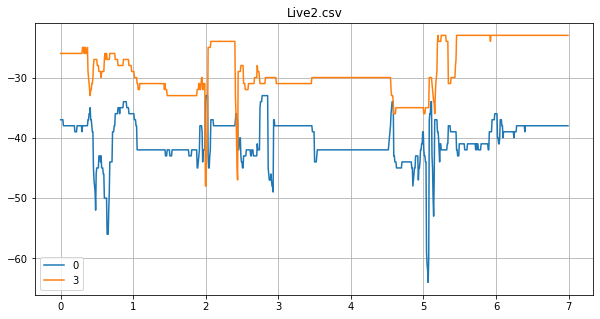

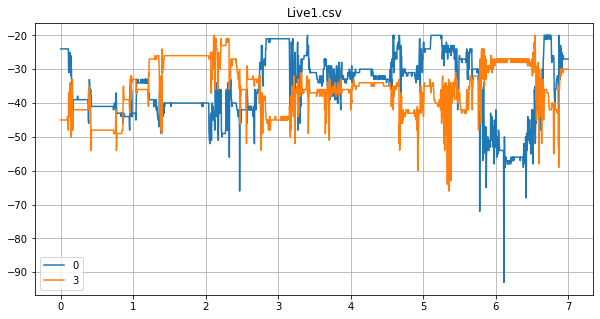

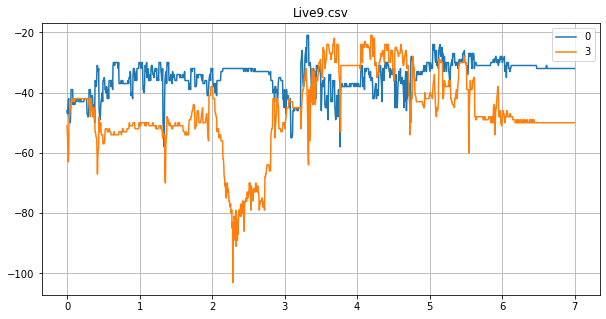

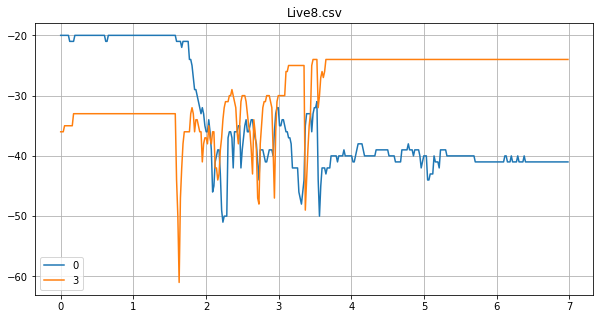

In [ ]:
for key in filesRssi.keys():
    plt.figure(figsize=(10, 5))
    plt.title(key)
    
    
    for i, l in enumerate(filesRssi[key]):
        distances = []
        for j in range(len(l)):
            distances.append(getDistance(7, j,len(l)))
        if i ==0 or i ==3:
            plt.plot(distances, l, label = i)
    plt.legend()
    plt.grid()
    plt.show()